This notebook finds the pixels within a range of right ascensions and declinations and finds their intensity as a function of frequency. All data is taken from the 2008 paper "A model of diffuse Galactic radio emission from 10 MHz to 100 GHz" by de Oliveira-Costa et al.

In [1]:
import pysm
from pysm.nominal import models
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.parse import urlencode
from urllib.request import urlretrieve
from IPython.display import Image
import astropy as apy
import astropy.coordinates
from astropy.coordinates import SkyCoord
from astropy.coordinates import GalacticLSR
from astropy.coordinates import Angle, Latitude, Longitude
import random
import scipy as spy

In [2]:
nside = 512 
sky_config = {
    'synchrotron' : models('s1', nside), 
    'dust' : models('d1', nside), 
    'freefree' : models('f1', nside), 
    'cmb' : models('c1', nside), 
    'ame' : models('a1', nside)
}
sky = pysm.Sky(sky_config)
#sets the sky and the resolution
#you have to run this cell twice in a row

/opt/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


In [3]:
xnew_uniform = np.geomspace(0.01,2.326,100)
xnew_uniform_log = np.log(xnew_uniform)

In [4]:
nu = np.linspace(0.05, 0.25, 30)
total_signal = sky.signal()(nu)
npix = hp.nside2npix(nside)

In [5]:
points = []
for q in range(15):
    vec = hp.ang2vec(np.random.uniform(0, np.pi), np.random.uniform(0, 2 * np.pi))
    result = vec.flatten() 
    ipix_disc = hp.query_disc(nside = 64, vec = result, radius = np.radians(5))
    m = np.arange(npix)
    m[ipix_disc] = m.max()
    points.append(ipix_disc)
#puts out random pixels on the sky

In [6]:
intensity = []
points = []
intensity1 = []
for q in range(15):
    vec = hp.ang2vec(np.random.uniform(0, np.pi), np.random.uniform(0, 2 * np.pi))
    result = vec.flatten() 
    ipix_disc = hp.query_disc(nside = 64, vec = result, radius = np.radians(5))
    m = np.arange(npix)
    m[ipix_disc] = m.max()
    points.append(ipix_disc)
for a in range(30):
    intensity.append(total_signal[a, 0, ipix_disc])
reshape = np.reshape(intensity, (-1, len(ipix_disc)))
for i in range(len(ipix_disc)):
    for m in range(len(nu)):
        intensity1.append(reshape[m][i])
r_intensity = np.reshape(intensity1, (-1, 30))
for b in range(30):
    print(plt.figtext(nu, r_intensity[b], s = ''))
#takes random points and puts out the intensity as a function of frequency at those points

Text([0.05       0.05689655 0.0637931  0.07068966 0.07758621 0.08448276
 0.09137931 0.09827586 0.10517241 0.11206897 0.11896552 0.12586207
 0.13275862 0.13965517 0.14655172 0.15344828 0.16034483 0.16724138
 0.17413793 0.18103448 0.18793103 0.19482759 0.20172414 0.20862069
 0.21551724 0.22241379 0.22931034 0.2362069  0.24310345 0.25      ], [5.99879778e+09 4.06909107e+09 2.88584464e+09 2.12036647e+09
 1.60341503e+09 1.24178468e+09 9.81257612e+08 7.88829914e+08
 6.43626379e+08 5.32003279e+08 4.44786670e+08 3.75653172e+08
 3.20147876e+08 2.75070669e+08 2.38082503e+08 2.07446768e+08
 1.81855760e+08 1.60312008e+08 1.42045689e+08 1.26456245e+08
 1.13070503e+08 1.01512232e+08 9.14797398e+07 8.27291937e+07
 7.50620776e+07 6.83156615e+07 6.23556945e+07 5.70707550e+07
 5.23678462e+07 4.81689369e+07], '')
Text([0.05       0.05689655 0.0637931  0.07068966 0.07758621 0.08448276
 0.09137931 0.09827586 0.10517241 0.11206897 0.11896552 0.12586207
 0.13275862 0.13965517 0.14655172 0.15344828 0.16034483

<Figure size 432x288 with 0 Axes>

## To plot the values

In [7]:
def find_pixel_numbers(nside, min_ra, max_ra, min_dec, max_dec):
    npix = hp.nside2npix(nside)
    pixel = []
    for i in range(npix):
        c = hp.pix2ang(nside, i, lonlat = True)
        if min_dec <= c[1] <= max_dec and min_ra <= c[0] <= max_ra:
            pixel.append(i)
    return(pixel)
#gives the pixel numbers in between certain right ascensions and declinations for whatever resolution you want
#right ascension and declination in degrees ra:(0, 360), dec:(-90, 90)

In [8]:
first = find_pixel_numbers(512, 0, 240, 1, 74) #0.010 GHz
second = find_pixel_numbers(512, 0, 360, -28, 80) #0.022GHz
third = find_pixel_numbers(512, 0, 360, -80, 65) #0.045 GHz
fourth = find_pixel_numbers(512, 0, 360, -90, 90) #0.408 GHz
fifth = find_pixel_numbers(512, 0, 360, -90, 90) #1.42 GHz
sixth = find_pixel_numbers(512, 0, 360, -83, 10) #2.326 GHz

In [9]:
freqs = np.array([0.010, 0.022, 0.045, 0.408, 1.42, 2.326])

In [10]:
def translate_to_galactic(pixels, nside):
    a = []
    galactic_pix = []
    gal = []
    ra = []
    dec = []
    a.append(hp.pix2ang(nside, pixels, lonlat = True))
    print(a)
#     for i in range(len(pixels)):
    gal = (SkyCoord(a[0][0], (a[0][1]), unit = 'deg'))
    f = gal.galactic
    ra.append(f.l.value)
    dec.append(f.b.value)
    galactic_pix.append(hp.ang2pix(nside, ra, dec, lonlat = True))
    return((hp.ang2pix(nside, ra, dec, lonlat = True)))
    #return(galacitc_pix)
    
#ra = lat, dec = long; 0 = lat, 1= lon

In [11]:
%%time
pix1 = translate_to_galactic(first, 512)
pix2 = translate_to_galactic(second, 512)
pix3 = translate_to_galactic(third, 512)
pix4 = translate_to_galactic(fourth, 512)
pix5 = translate_to_galactic(fifth, 512)
pix6 = translate_to_galactic(sixth, 512)

[(array([  0.25714286,   0.77142857,   1.28571429, ..., 239.50195312,
       239.67773438, 239.85351562]), array([73.95777479, 73.95777479, 73.95777479, ...,  1.04451217,
        1.04451217,  1.04451217]))]
[(array([  0.40909091,   1.22727273,   2.04545455, ..., 359.56054688,
       359.73632812, 359.91210938]), array([ 79.93628938,  79.93628938,  79.93628938, ..., -27.95318688,
       -27.95318688, -27.95318688]))]
[(array([1.65441176e-01, 4.96323529e-01, 8.27205882e-01, ...,
       3.57954545e+02, 3.58772727e+02, 3.59590909e+02]), array([ 64.9480841 ,  64.9480841 ,  64.9480841 , ..., -79.93628938,
       -79.93628938, -79.93628938]))]
[(array([ 45., 135., 225., ..., 135., 225., 315.]), array([ 89.90862927,  89.90862927,  89.90862927, ..., -89.90862927,
       -89.90862927, -89.90862927]))]
[(array([ 45., 135., 225., ..., 135., 225., 315.]), array([ 89.90862927,  89.90862927,  89.90862927, ..., -89.90862927,
       -89.90862927, -89.90862927]))]
[(array([0.00000000e+00, 1.75781250e-01

<IPython.core.display.Javascript object>


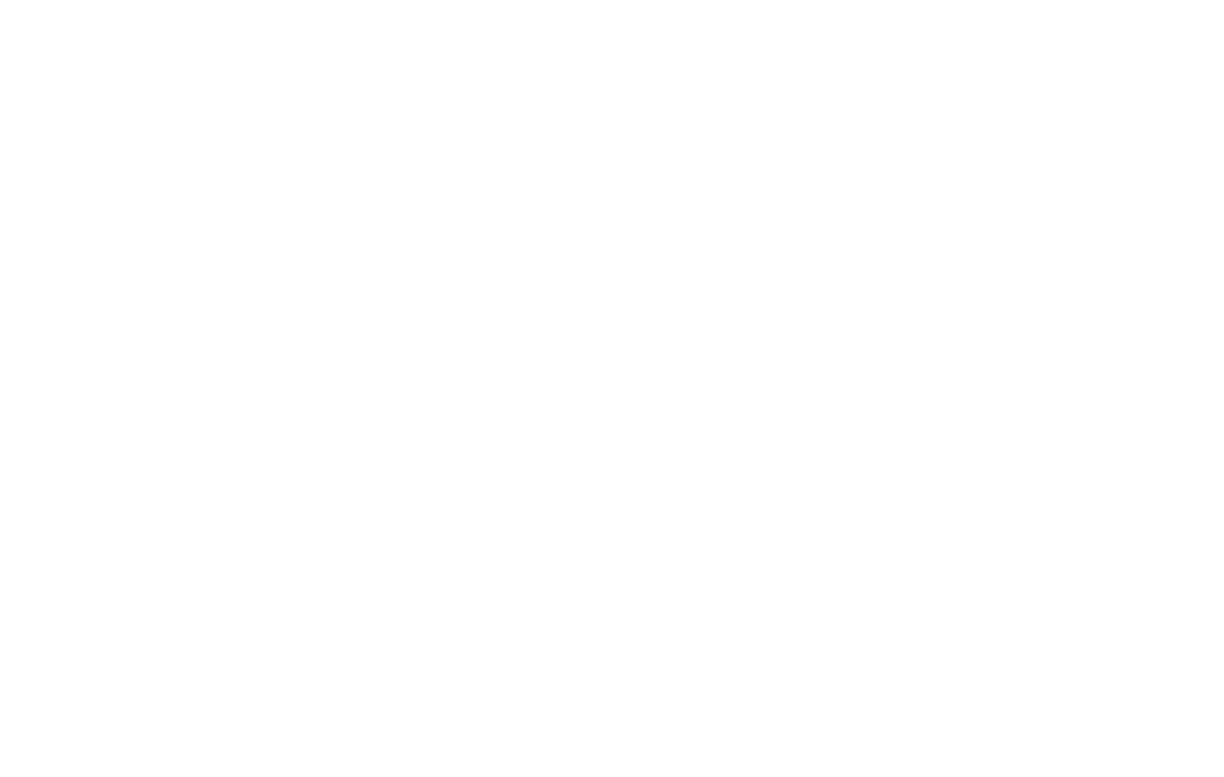

<IPython.core.display.Javascript object>


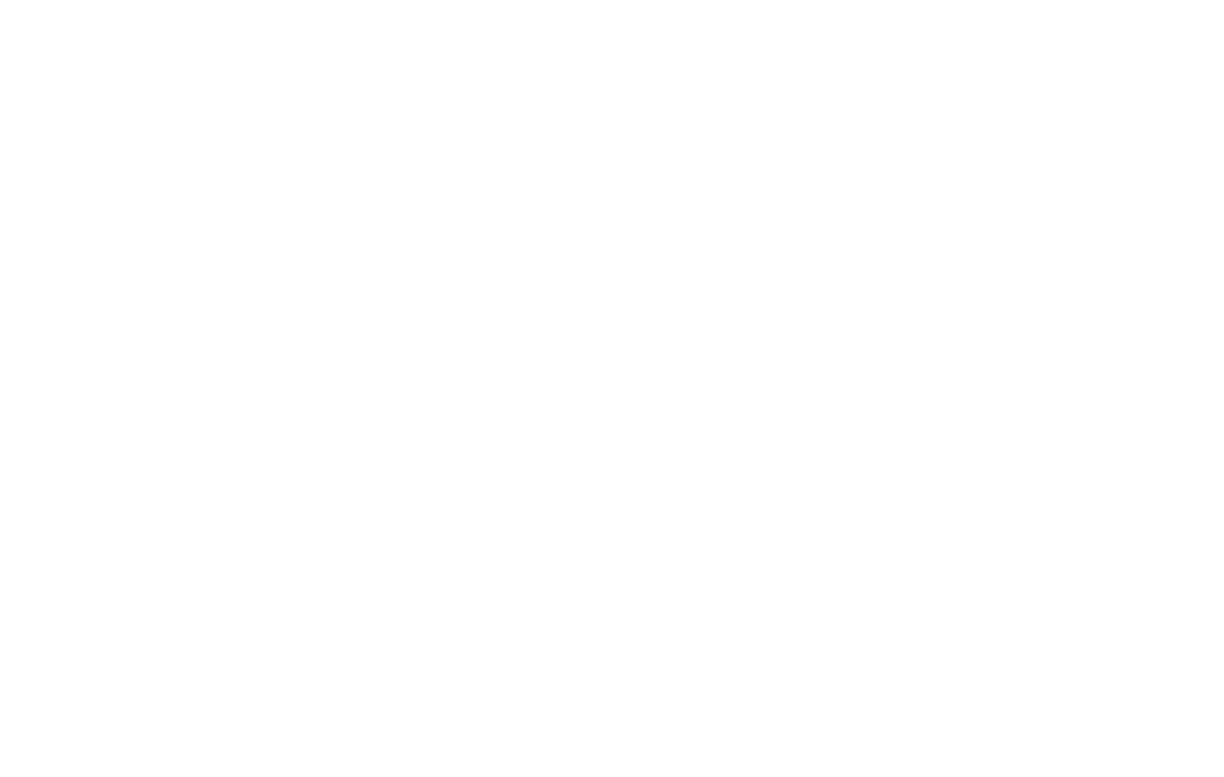

In [12]:
%matplotlib notebook
signal = sky.signal()(freqs)
signal[0, 0, pix1[0]] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')
#the pixels given with the right ascensions and declinations are in yellow. I had to change from celestial? to galactic

<IPython.core.display.Javascript object>


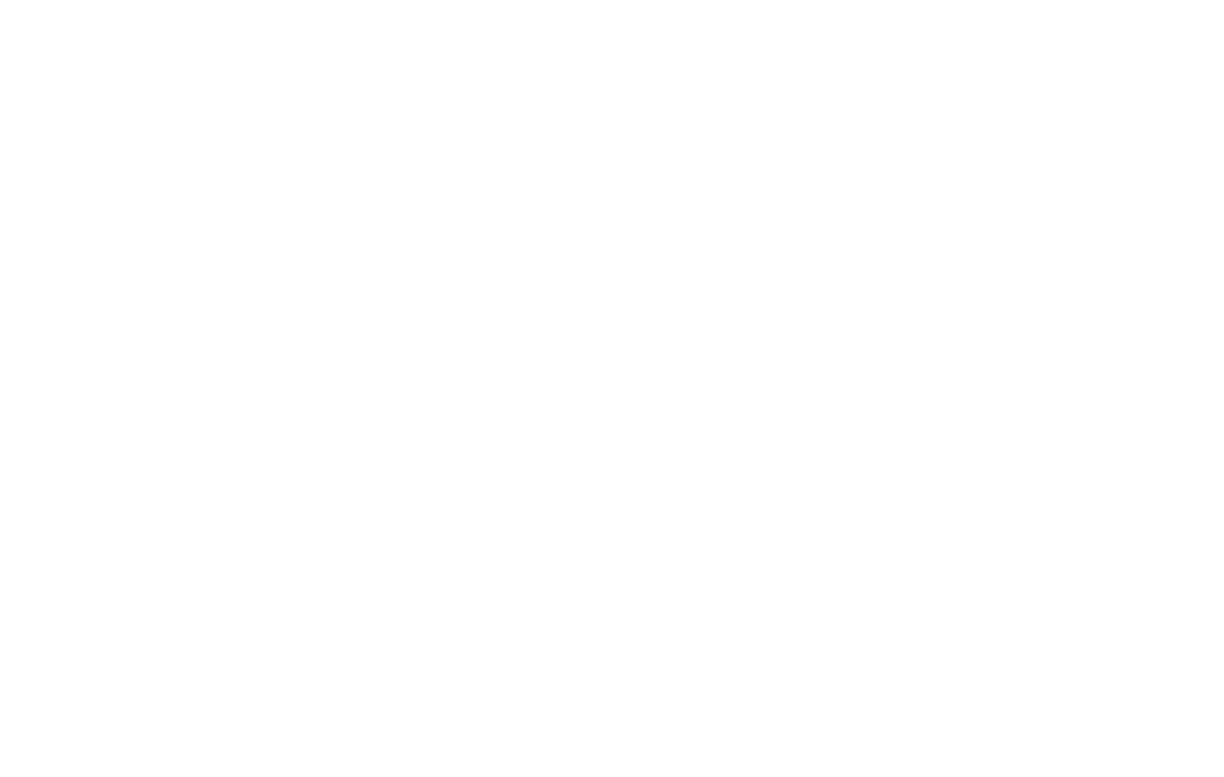

In [13]:
%matplotlib notebook
signal = sky.signal()(freqs)
signal[0, 0, pix2[0]] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')

<IPython.core.display.Javascript object>


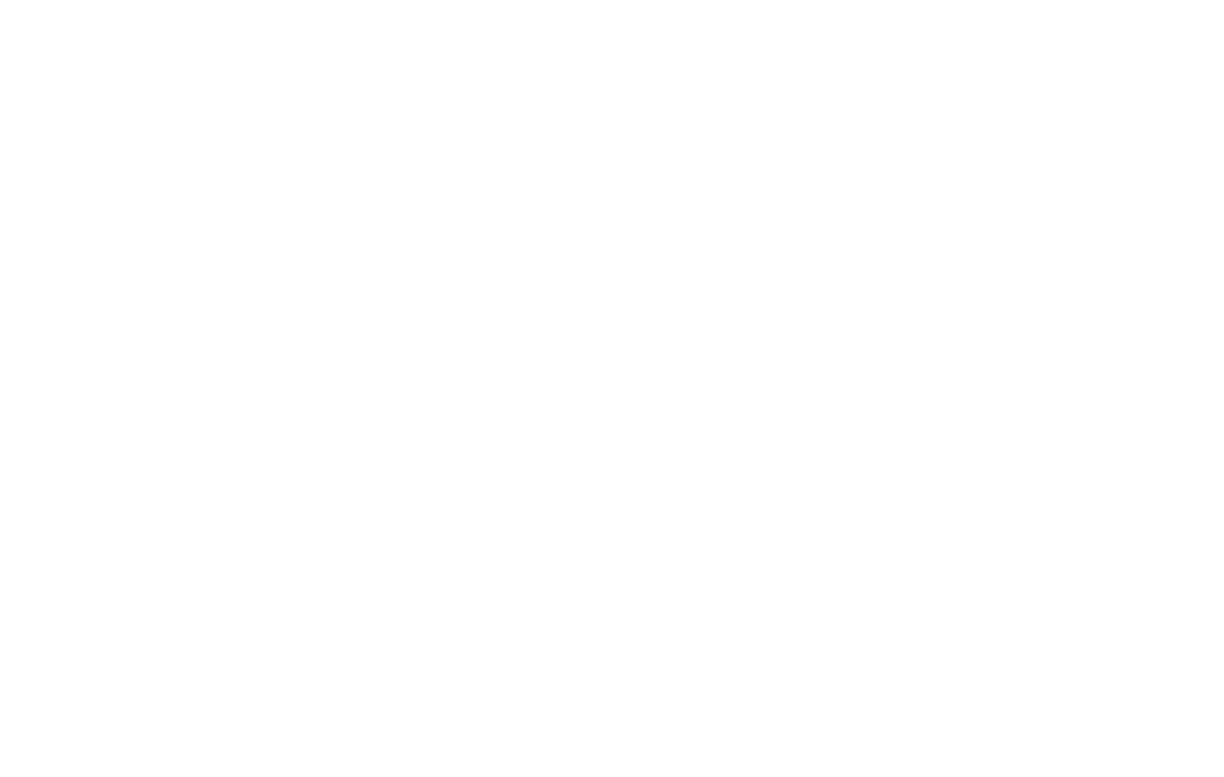

In [14]:
signal = sky.signal()(freqs)
signal[0, 0, pix3[0]] = 100000000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')

<IPython.core.display.Javascript object>


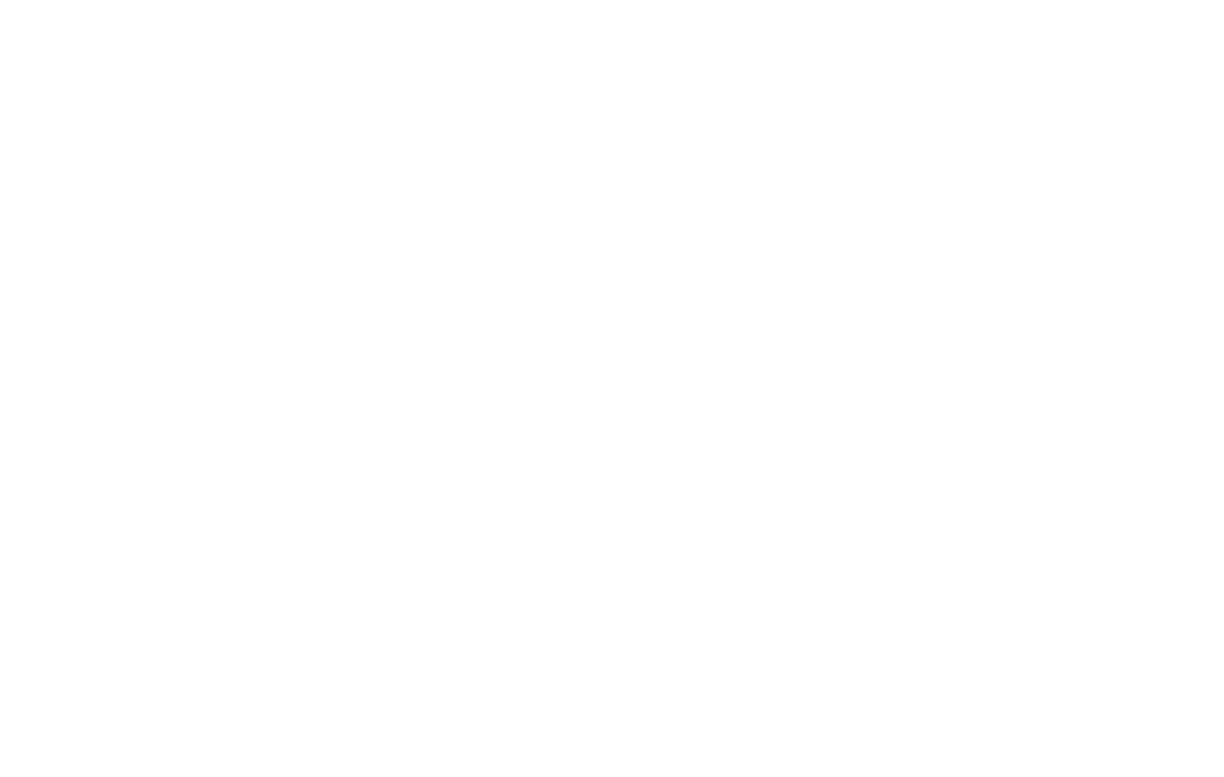

In [15]:
signal = sky.signal()(freqs)
signal[0, 0, pix4[0]] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')
#this one and the next one cover the whole sky

<IPython.core.display.Javascript object>


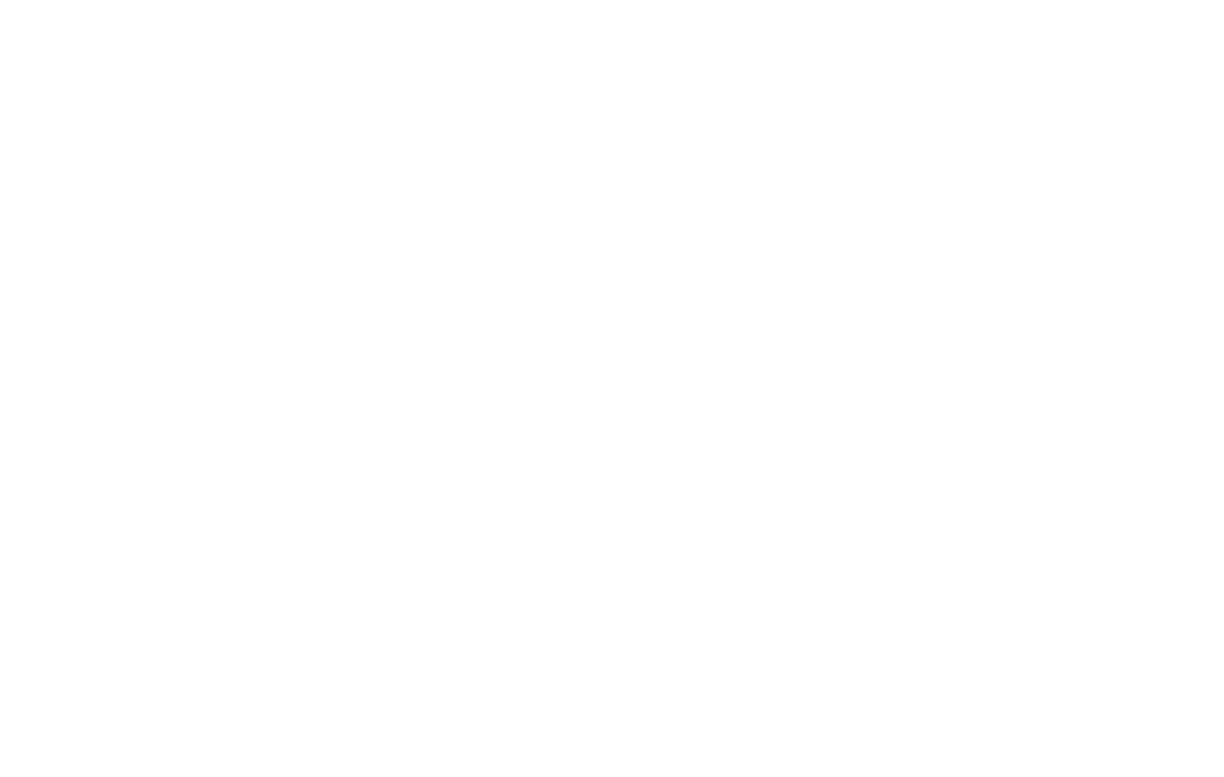

In [16]:
signal = sky.signal()(freqs)
signal[0, 0, pix5[0]] = 100000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')

<IPython.core.display.Javascript object>


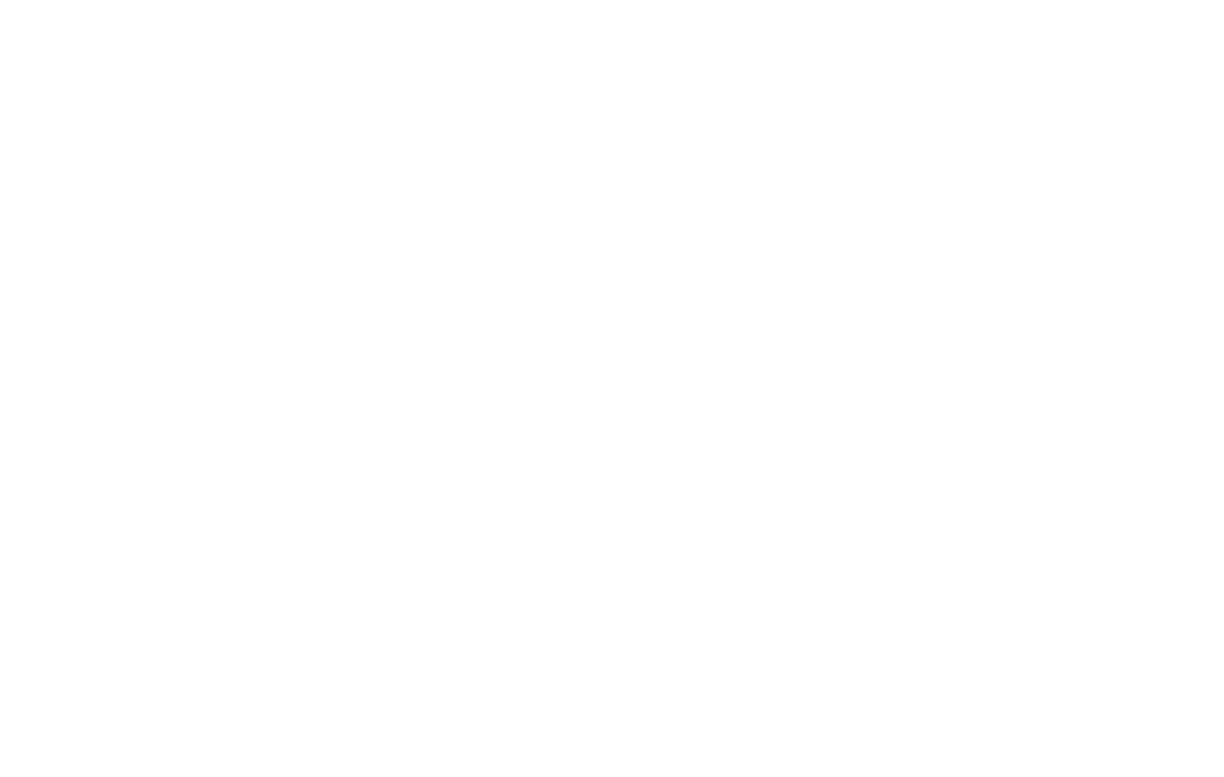

In [17]:
signal = sky.signal()(freqs)
signal[0, 0, pix6[0]] = 10000000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')

In [18]:
#finds where the pixels on all of the maps intersect
all1 = np.intersect1d(pix1[0], pix2[0])
all2 = np.intersect1d(all1, pix3[0])
all3 = np.intersect1d(all2, pix4[0])
all4 = np.intersect1d(all3, pix5[0])
pix_all = np.intersect1d(all4, pix6[0])

In [19]:
print(len(all1))
print(len(all2))
print(len(all3))
print(len(all4))
len(pix_all)

868495
819402
819402
819402


145846

<IPython.core.display.Javascript object>


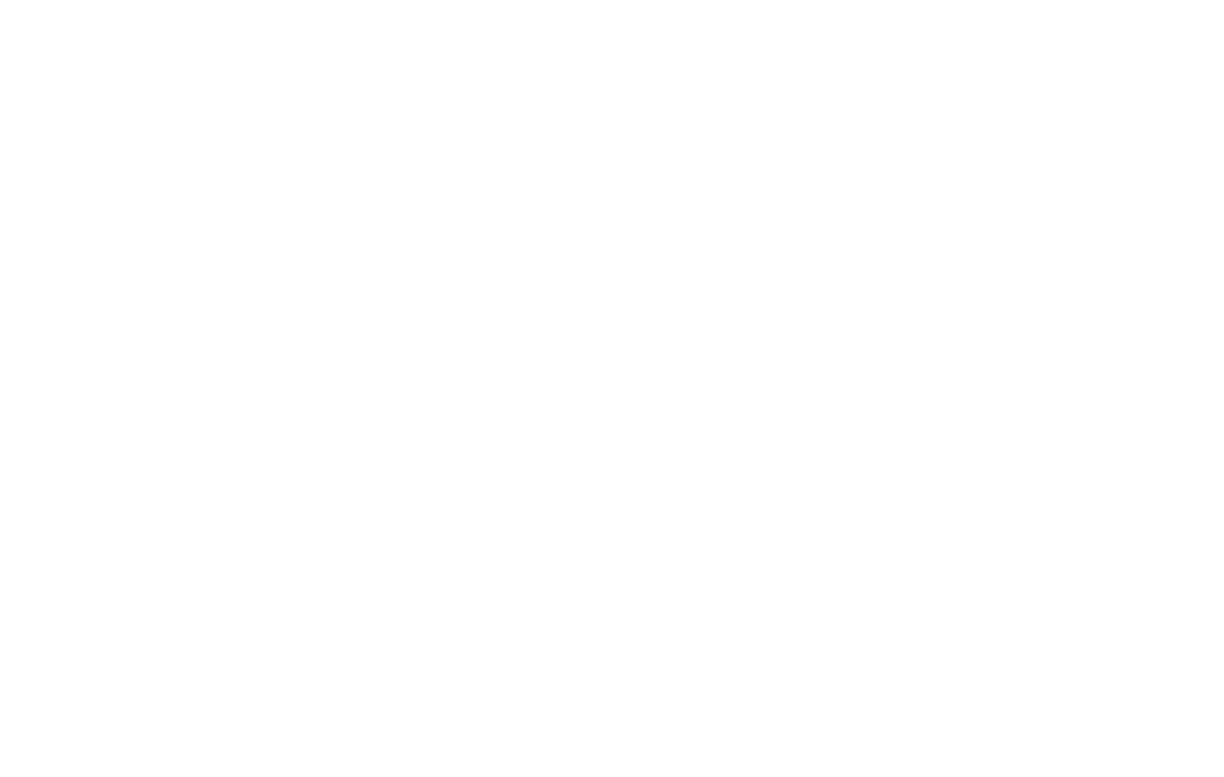

In [20]:
#plots the pixels on all six of the maps in yellow
signal = sky.signal()(freqs)
signal[0, 0, pix_all] = 100000000000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', title = 'Map of the galaxy with pixels superimposed')

In [21]:
g = find_pixel_numbers(512, 0, 360, -90, -83)

In [22]:
l = translate_to_galactic(g, 512)

[(array([  0.59210526,   1.77631579,   2.96052632, ..., 135.        ,
       225.        , 315.        ]), array([-83.05156816, -83.05156816, -83.05156816, ..., -89.90862927,
       -89.90862927, -89.90862927]))]


In [23]:
pixs_2freq = l[0]

In [24]:
m = find_pixel_numbers(512, 0, 360, 80, 90)

In [25]:
n = translate_to_galactic(m, 512)
pixs_2freq_2 = n[0]

[(array([ 45.        , 135.        , 225.        , ..., 357.93577982,
       358.76146789, 359.58715596]), array([89.90862927, 89.90862927, 89.90862927, ..., 80.02801037,
       80.02801037, 80.02801037]))]


In [26]:
sig = sky.signal()(xnew_uniform_log)

/Users/annakin/PySM_public/PySM_public/pysm/components.py:1031: RuntimeWarning: invalid value encountered in power
  return (nu / nu_0) ** b
/Users/annakin/PySM_public/PySM_public/pysm/components.py:1031: RuntimeWarning: invalid value encountered in double_scalars
  return (nu / nu_0) ** b


In [27]:
def sky_read(pix_nums, full_sky_maps, frequencies):
    intensity = []
    new_intensity = []
    r_intensity = []
    intensity1 = []
    for a in range(len(frequencies)):
        intensity.append(full_sky_maps[a, 0, pix_nums])
    new_intensity.append(np.reshape(intensity, (-1, len(pix_nums))))
    for i in range(len(pix_nums)):
        for m in range(len(frequencies)):
            intensity1.append(new_intensity[0][m][i])
    r_intensity.append(np.reshape(intensity1, (-1, len(frequencies))))
    return(r_intensity)

In [28]:
fr = np.linspace( 0.01, 2.326, 100)

In [29]:
o = sky_read(pixs_2freq, sky.signal()(xnew_uniform_log), xnew_uniform_log)
data_2_freqs = o[0]
#The data where two frequencies overlap

In [30]:
op = sky_read(pixs_2freq_2, sky.signal()(xnew_uniform_log), xnew_uniform_log)
data_2_freqs_2 = op[0]
#The other data where two frequencies overlap

In [31]:
q = [data_2_freqs[:, 3], data_2_freqs[:, 4]]
u = [data_2_freqs_2[:, 3], data_2_freqs_2[:, 4]]

In [32]:
r = []
intensity1 = []
for i in range(len(pixs_2freq)):
    for m in range(2):
        intensity1.append(q[m][i])
r.append(np.reshape(intensity1, (-1, 2)))
s = r[0]

In [33]:
t = []
intensity1 = []
for i in range(len(pixs_2freq)):
    for m in range(2):
        intensity1.append(u[m][i])
r.append(np.reshape(intensity1, (-1, 2)))
v = u[0]

In [34]:
p = sky_read(pixs_2freq_2, sky.signal()(fr), fr)
data_2_freqs_2 = p[0]

In [35]:
np.savez('data_at_2_frqs.npz', s)

In [36]:
np.savez('data_at_2_frqs_2.npz', u)

In [37]:
#this is the data for these pixels
m = sky_read(pix_all, sky.signal()(freqs), freqs)
data_all = m[0]

In [38]:
np.savez('all_data.npz', data_all)

<IPython.core.display.Javascript object>


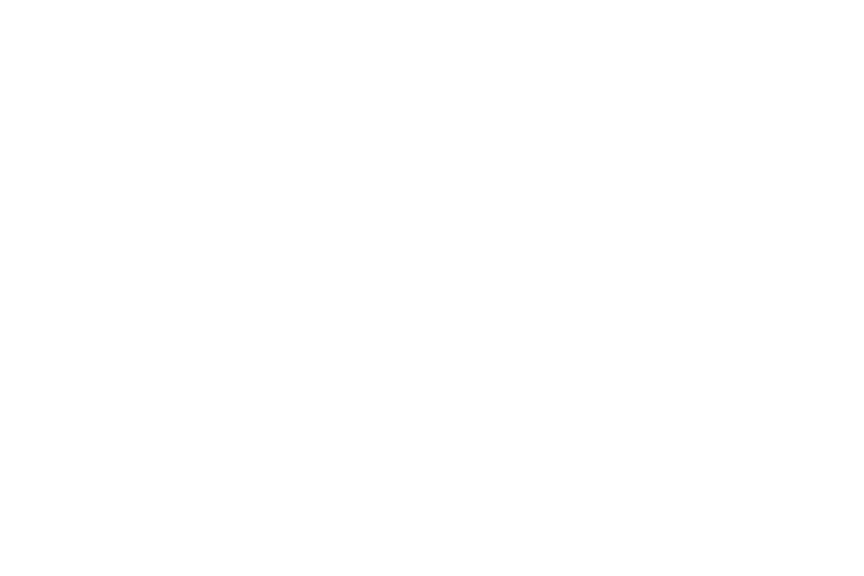

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [39]:
#this plots the first 5000 pixels of the data
plt.figure()
for i in range(5000):
    plt.loglog(freqs, data_all[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Pixel brightness vs frequency', fontsize = 20)

In [40]:
avg = []
for i in range(len(freqs)):
    avg.append(np.average(signal[i, 0, :]))

In [41]:
#this adds noise to the data
data = []
data1 = []
for i in range(len(pix_all)):
    for m in range(len(freqs)):
        data.append((data_all[i][m] + np.random.normal(loc = 0, scale = 0.1 * avg[m])))
data1.append(np.reshape(data, (-1, len(freqs))))
noisy_data = data1[0]

In [42]:
np.savez('noisy_data_2.npz', noisy_data)

<IPython.core.display.Javascript object>


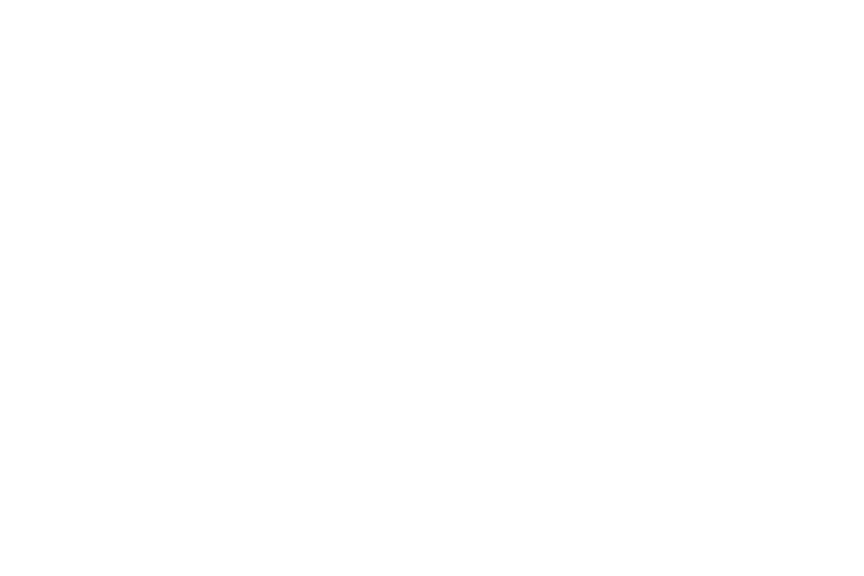

Text(0.5, 1.0, 'Noisy pixel brightness vs frequency')

In [43]:
#the graph for the first 500 pixels of the noisy data
plt.figure()
for i in range(500):
    plt.loglog(freqs, noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Noisy pixel brightness vs frequency', fontsize = 20)

Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


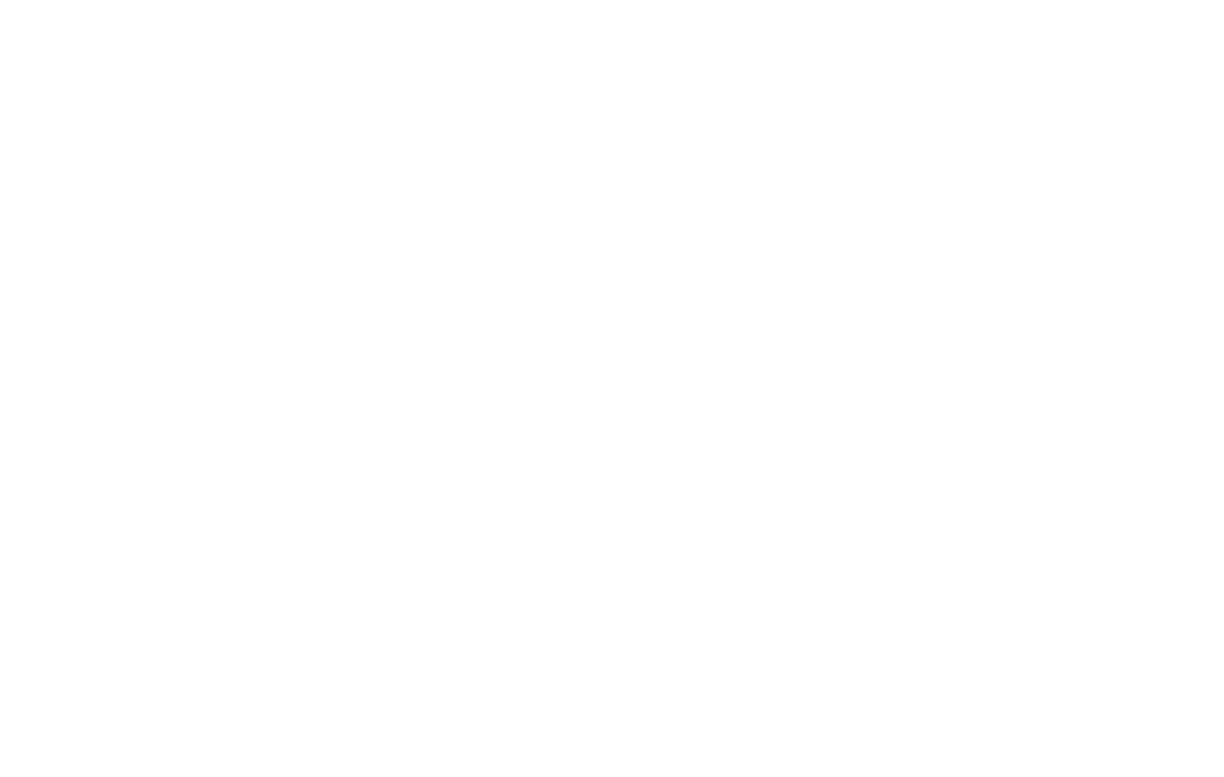

In [44]:
signal = sky.signal()(freqs)
map_out = hp.sphtfunc.smoothing(signal[0, 0, :], fwhm = 0.17, iter = 1)
hp.mollview(map_out, nest = False, cmap = 'inferno', norm = 'hist')
#maps the smoothed data

In [45]:
#this is the data smoothed by the same amount for all of it
map_out = []
for i in range(6):
    map_out.append(hp.sphtfunc.smoothing(signal[i, 0, :], fwhm = 0.17, iter = 1))

Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 248.179028 arcmin (0.072192 rad) 
-> fwhm is 584.416951 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [46]:
#this is the data smoothed by random amounts for each point and then reshaped to a 2d array with shape (163860, 6)
#while still maintaining overall integrity of the data
#You want it to have this shape in order to plot these intensities vs the frequencies, which have length 6
data4 = []
data5 = []
data6 = []
data7 = []
for i in range(6):
    data4.append(hp.sphtfunc.smoothing(signal[i, 0, :], fwhm = random.uniform(0, 1), iter = 1))
for i in range(len(freqs)):
    data7.append(data4[i][pix_all])
for i in range(len(pix_all)):
    for m in range(len(freqs)):
        data5.append((data7[m][i]))
data6.append(np.reshape(data5, (-1, len(freqs))))
blurry_data = data6[0]

Sigma is 929.182333 arcmin (0.270288 rad) 
-> fwhm is 2188.057183 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 674.928528 arcmin (0.196329 rad) 
-> fwhm is 1589.335227 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 1331.341822 arcmin (0.387272 rad) 
-> fwhm is 3135.070410 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 400.265459 arcmin (0.116433 rad) 
-> fwhm is 942.553127 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 1450.147752 arcmin (0.421831 rad) 
-> fwhm is 3414.836994 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 328.278483 arcmin (0.095492 rad) 
-> fwhm is 773.036752 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [47]:
np.savez('blurry_data_new.npz', blurry_data)

<IPython.core.display.Javascript object>


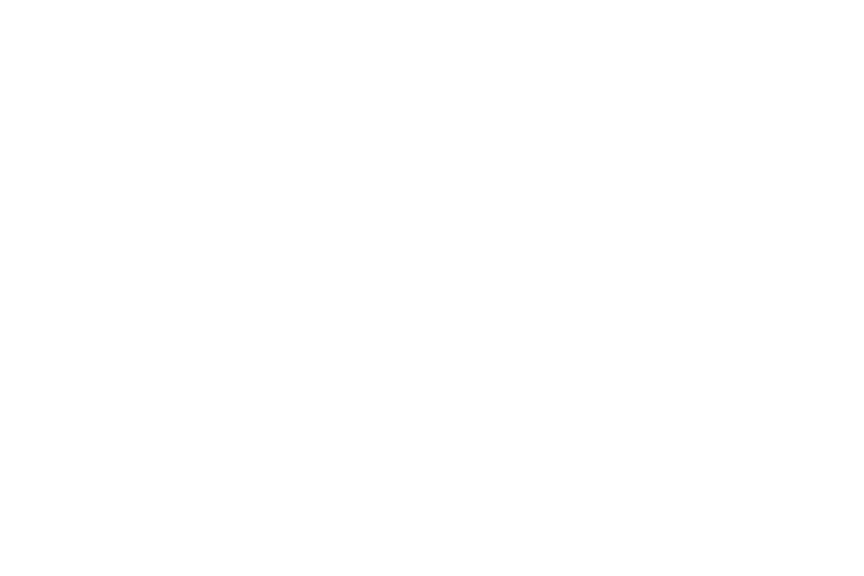

Text(0.5, 1.0, 'Smoothed pixel brightness vs frequency')

In [48]:
#here's the first 5000 pixels of the blurry data
plt.figure()
for i in range(500):
    plt.loglog(freqs, blurry_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Smoothed pixel brightness vs frequency', fontsize = 20)

In [49]:
avg2 = []
for i in range(len(freqs)):
    avg2.append(np.average(blurry_data[:,i]))

In [50]:
#this takes the blurry data, and adds random values in to each of the points to simulate noise
data2 = []
data3 = []
for i in range(len(pix_all)):
    for m in range(len(freqs)):
        data2.append((blurry_data[i][m] + np.random.normal(loc = 0, scale = 0.1 * avg2[m])))
data3.append(np.reshape(data2, (-1, len(freqs))))
blurry_noisy_data = data3[0]

In [51]:
np.savez('blurry_noisy_data_2.npz', blurry_noisy_data)

<IPython.core.display.Javascript object>


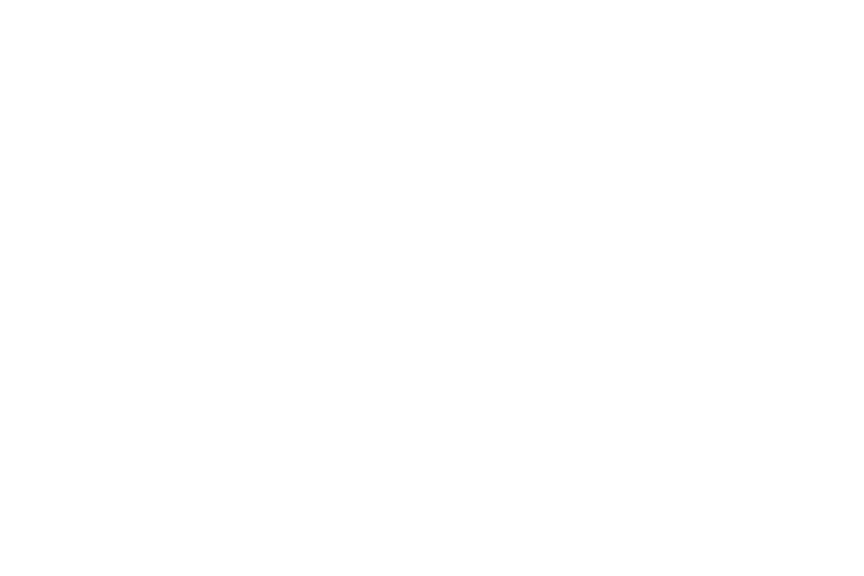

Text(0.5, 1.0, 'Smooth and noisy pixel brightness vs frequency')

In [52]:
plt.figure()
for i in range(500):
    plt.loglog(freqs, blurry_noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Smooth and noisy pixel brightness vs frequency', fontsize = 15)

Here is just the graph of the first 500 pixels on the map

In [53]:
nu = np.linspace(0.1, 50, 30)
total_signal = sky.signal()(nu)
pix = np.arange(1, 501)
brightness = []
new_brightness = []

for i in range(30):
    brightness.append((total_signal[i, 0, pix]))

for i in range(len(pix)):
    for m in range(30):
        new_brightness.append(brightness[m][i])

new_new_brightness = np.reshape(new_brightness, (-1, 30))

<IPython.core.display.Javascript object>


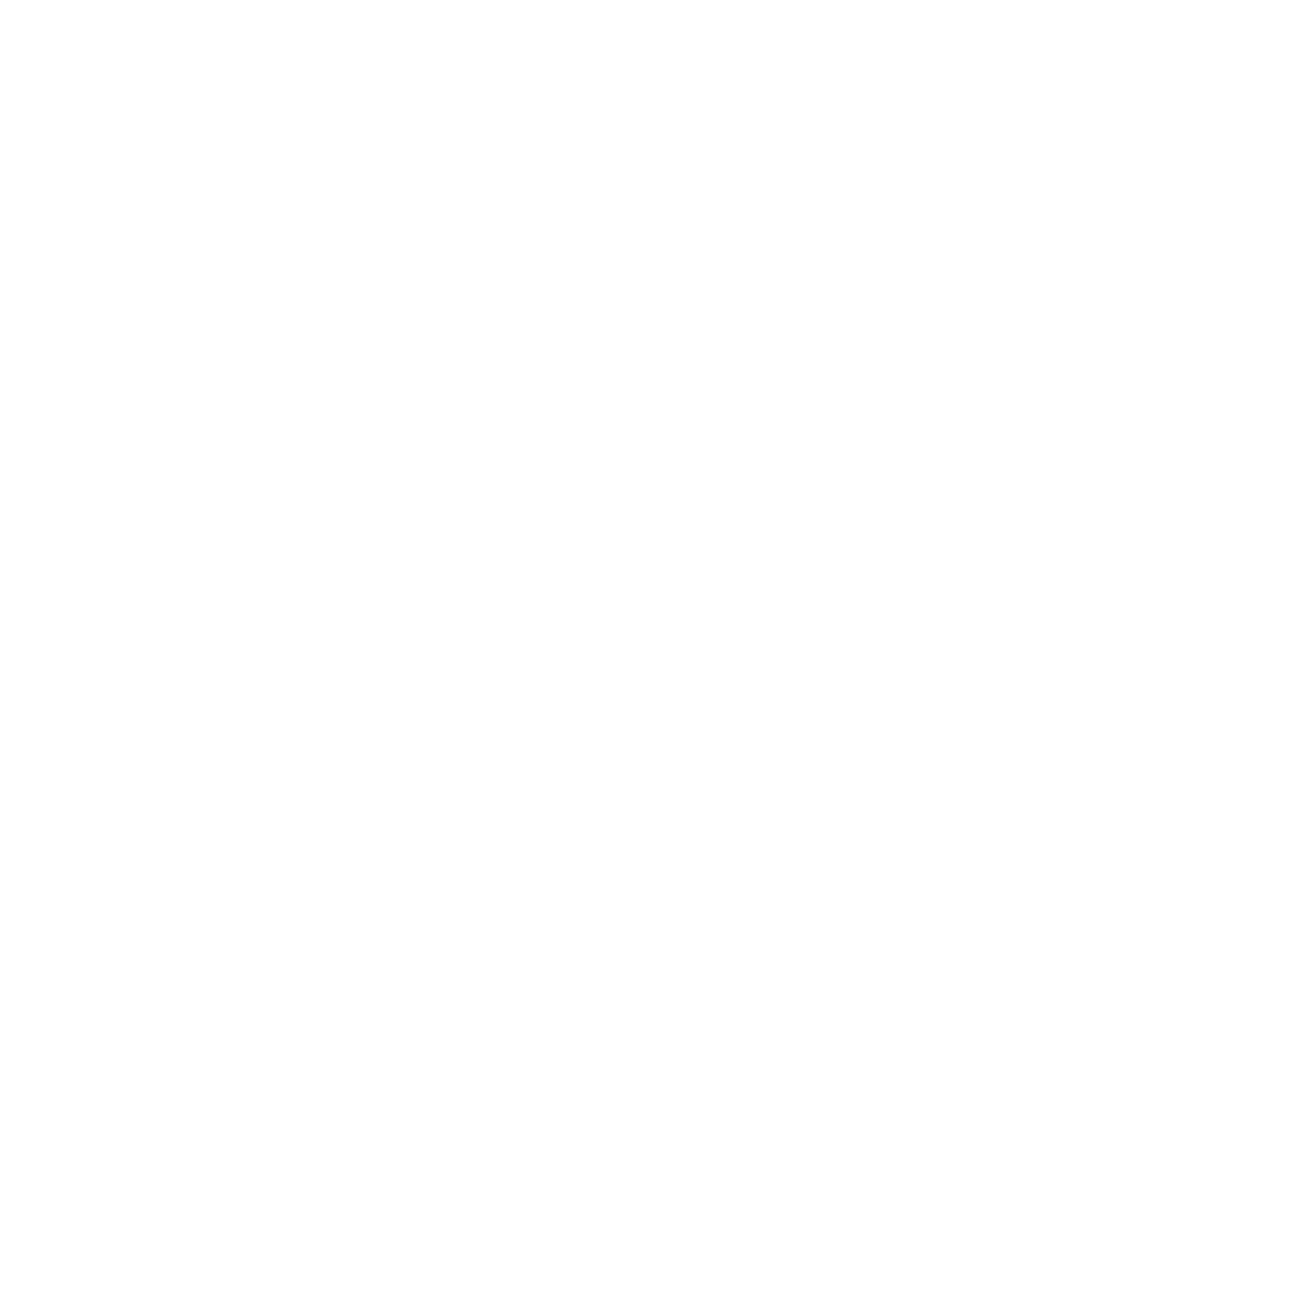

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [54]:
%matplotlib notebook

plt.figure(figsize = (9, 9))
for r in range(len(pix)):
    plt.loglog(nu, new_new_brightness[r])
    
plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)
plt.title('Pixel brightness vs frequency')

<IPython.core.display.Javascript object>


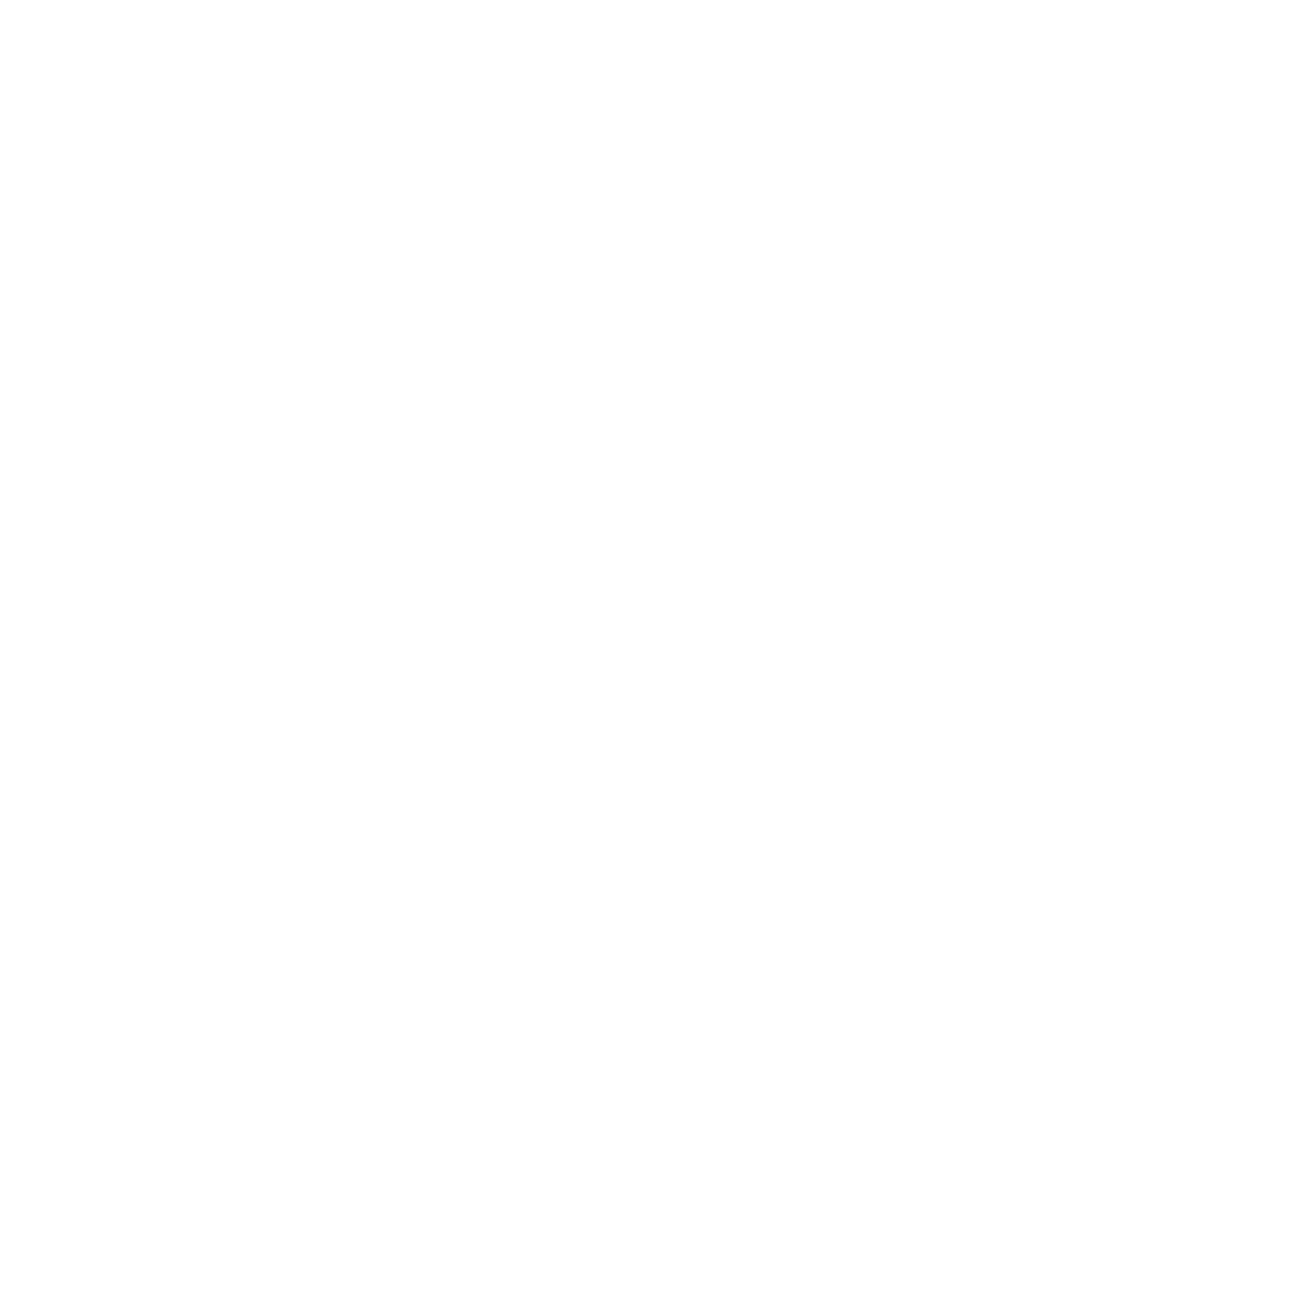

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [55]:
%matplotlib notebook

plt.figure(figsize = (9, 9))
for r in range(len(pix)):
    plt.plot(nu, new_new_brightness[r])
    
plt.xlabel('Frequency (GHz)', fontsize = 20)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 20)
plt.title('Pixel brightness vs frequency')

In [56]:
#np.savez('500pixels', new_new_brightness)

This is making the same adjustments to data within the galactic plane instead of the pixels from the paper.

In [57]:
vec = hp.ang2vec(np.pi / 2, - np.pi / 2)
result = vec.flatten() 
ipix_disc = hp.query_disc(nside = 512, vec = result, radius = np.radians(20))

<IPython.core.display.Javascript object>


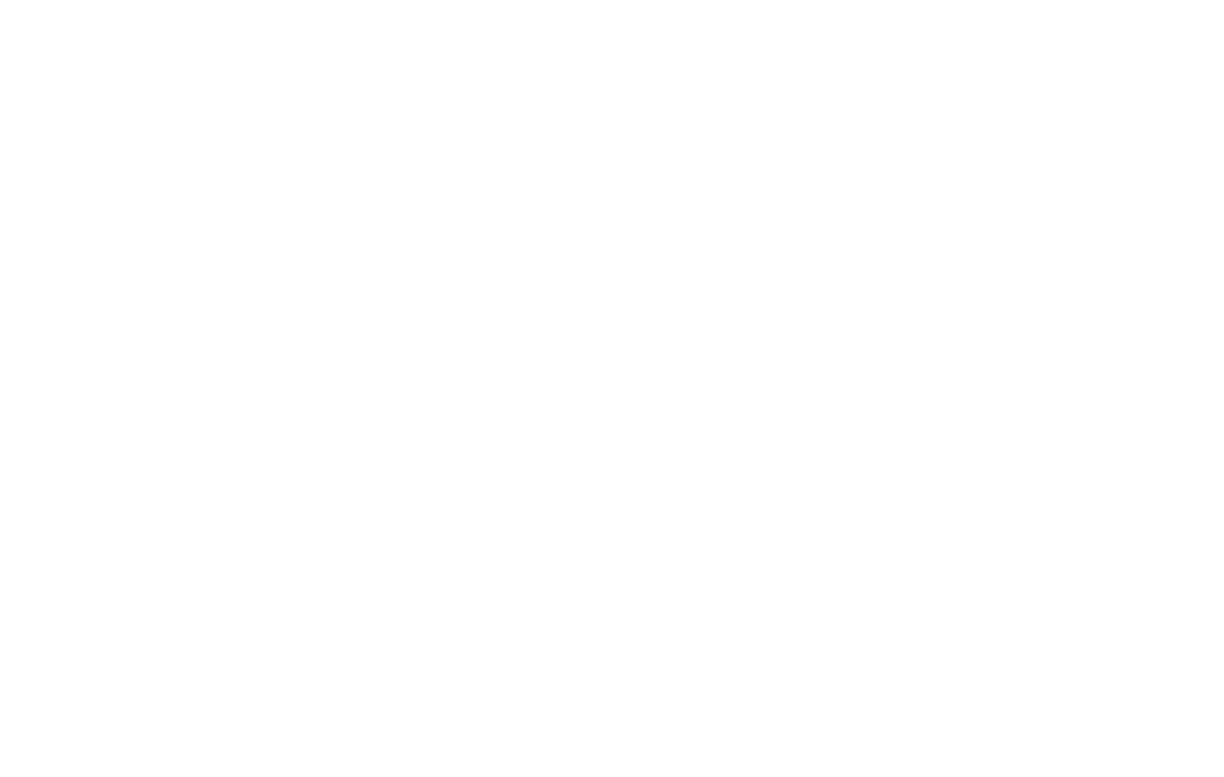

In [58]:
signal = sky.signal()(freqs)
signal[0, 0, ipix_disc] = 10000000000
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')

In [59]:
data = sky_read(ipix_disc, sky.signal()(freqs), freqs)

<IPython.core.display.Javascript object>


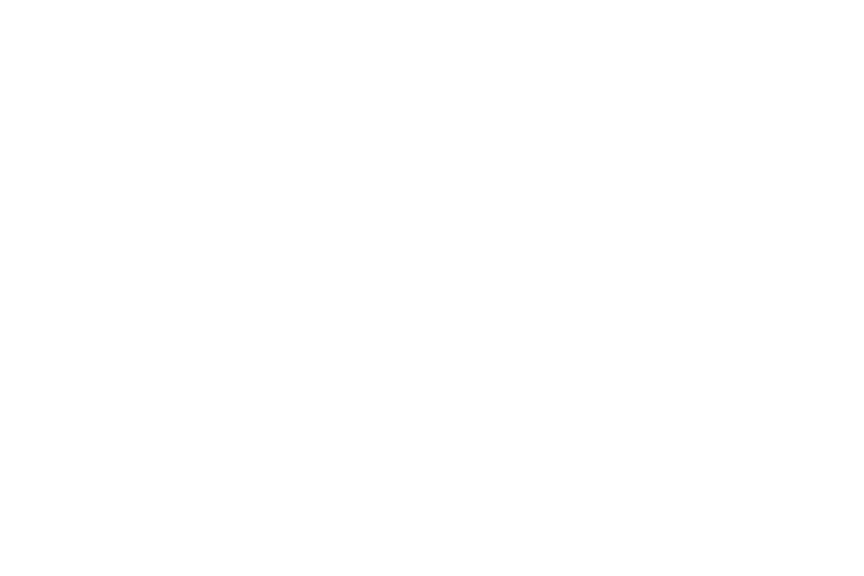

Text(0.5, 1.0, 'Clean pixel brightness in the galactic plane vs frequency')

In [60]:
%matplotlib notebook
plt.figure()
for i in range(500):
    plt.loglog(freqs, data[0][i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Clean pixel brightness in the galactic plane vs frequency', fontsize = 10)

In [61]:
np.savez('diff_data.npz', data[0])

In [62]:
avg3 = []
for i in range(len(freqs)):
    avg3.append(np.average(data[0][:][i]))

In [63]:
da = []
data1 = []
for i in range(len(ipix_disc)):
    for m in range(len(freqs)):
        da.append((data[0][i][m] + np.random.normal(loc = 0, scale = avg3[m])))
data1.append(np.reshape(da, (-1, len(freqs))))
diff_noisy_data = data1[0]

<IPython.core.display.Javascript object>


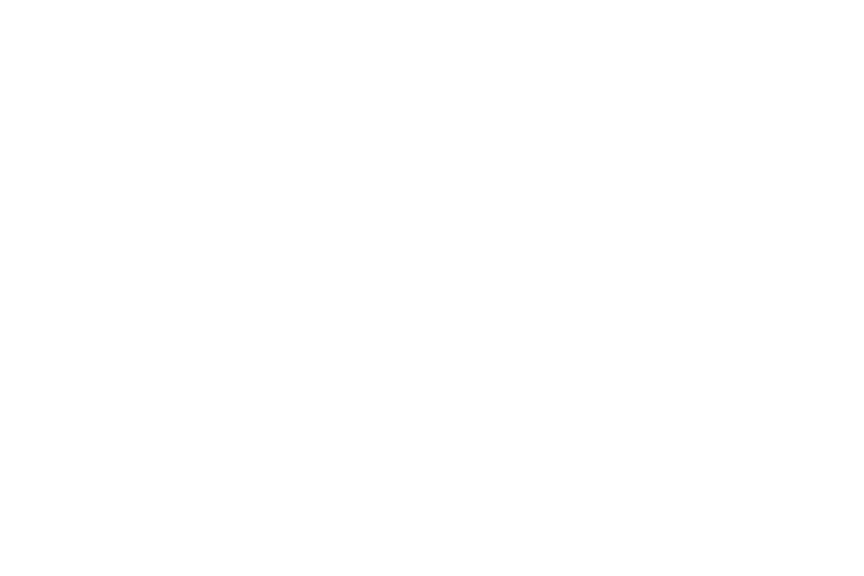

Text(0.5, 1.0, 'Noisy pixel brightness vs frequency')

In [64]:
plt.figure()
for i in range(500):
    plt.loglog(freqs, diff_noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Noisy pixel brightness vs frequency', fontsize = 20)

In [65]:
np.savez('diff_noisy_data.npz', diff_noisy_data)

In [66]:
data4 = []
data5 = []
data6 = []
data7 = []
for i in range(6):
    data4.append(hp.sphtfunc.smoothing(signal[i, 0, :], fwhm = random.uniform(0, 1), iter = 1))
for i in range(len(freqs)):
    data7.append(data4[i][ipix_disc])
for i in range(len(ipix_disc)):
    for m in range(len(freqs)):
        data5.append((data7[m][i]))
data6.append(np.reshape(data5, (-1, len(freqs))))
diff_blurry_data = data6[0]

Sigma is 665.972262 arcmin (0.193723 rad) 
-> fwhm is 1568.244831 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 888.973595 arcmin (0.258592 rad) 
-> fwhm is 2093.372841 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 302.289135 arcmin (0.087932 rad) 
-> fwhm is 711.836515 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 257.846997 arcmin (0.075005 rad) 
-> fwhm is 607.183278 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 218.401136 arcmin (0.063530 rad) 
-> fwhm is 514.295373 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 1216.661123 arcmin (0.353912 rad) 
-> fwhm is 2865.018001 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


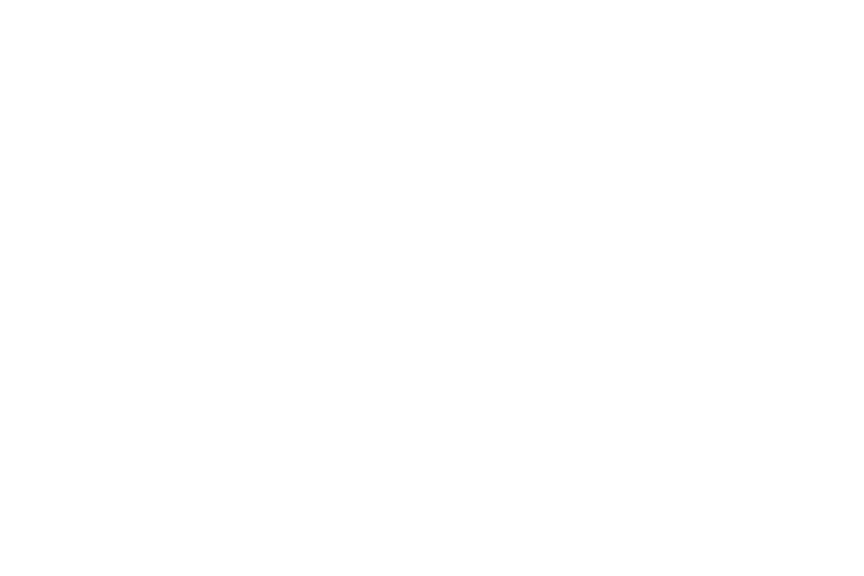

Text(0.5, 1.0, 'Smooth pixel brightness vs frequency')

In [67]:
%matplotlib notebook
plt.figure()
for i in range(500):
    plt.loglog(freqs, diff_blurry_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Smooth pixel brightness vs frequency', fontsize = 20)

In [68]:
np.savez('diff_blurry_data.npz', diff_blurry_data)

In [69]:
np.shape(diff_blurry_data)

(94830, 6)

In [70]:
avg4 = []
for i in range(len(freqs)):
    avg4.append(np.average(diff_blurry_data[:, i]))

In [71]:
data2 = []
data3 = []
for i in range(len(ipix_disc)):
    for m in range(len(freqs)):
        data2.append((diff_blurry_data[i][m] + np.random.normal(loc = 0, scale = avg4[m])))
data3.append(np.reshape(data2, (-1, len(freqs))))
diff_blurry_noisy_data = data3[0]

<IPython.core.display.Javascript object>


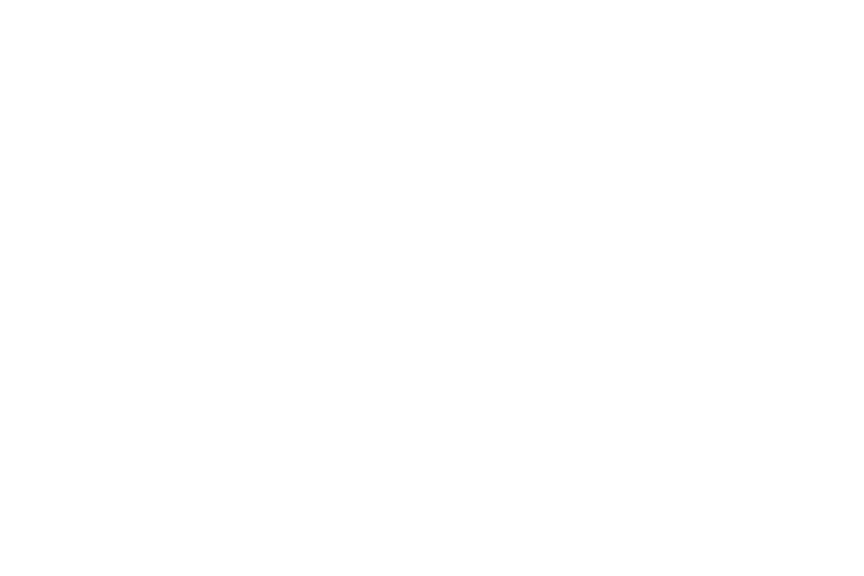

Text(0.5, 1.0, 'Smooth and noisy pixel brightness vs frequency')

In [72]:
%matplotlib notebook
plt.figure()
for i in range(500):
    plt.loglog(freqs, diff_blurry_noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Smooth and noisy pixel brightness vs frequency', fontsize = 15)

In [73]:
np.savez('diff_blurry_noisy_data.npz', diff_blurry_noisy_data)

In [74]:
data8 = []
data9 = []
data10 = []
data11 = []
r = np.linspace(1, 0, 6)
for i in range(6):
    data8.append(hp.sphtfunc.smoothing(signal[i, 0, :], fwhm = r[i], iter = 1))
for i in range(len(freqs)):
    data9.append(data8[i][ipix_disc])
for i in range(len(ipix_disc)):
    for m in range(len(freqs)):
        data10.append((data9[m][i]))
data11.append(np.reshape(data10, (-1, len(freqs))))
diff_blurry_data_2 = data11[0]
#This systematically blurs out the data

Sigma is 1459.876638 arcmin (0.424661 rad) 
-> fwhm is 3437.746771 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 1167.901311 arcmin (0.339729 rad) 
-> fwhm is 2750.197417 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 875.925983 arcmin (0.254797 rad) 
-> fwhm is 2062.648062 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 583.950655 arcmin (0.169864 rad) 
-> fwhm is 1375.098708 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 291.975328 arcmin (0.084932 rad) 
-> fwhm is 687.549354 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


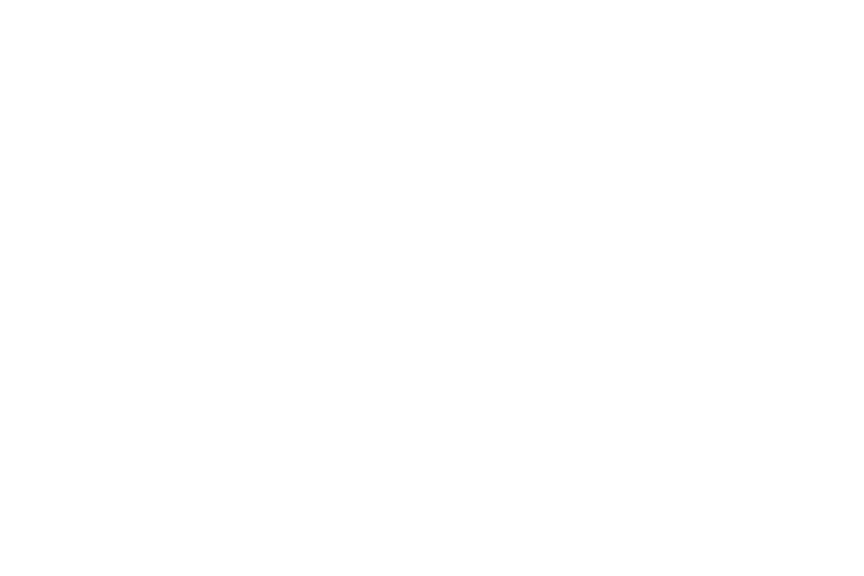

Text(0.5, 1.0, 'Systematically smooth pixel brightness vs frequency')

In [75]:
plt.figure()
for i in range(500):
    plt.loglog(freqs, diff_blurry_data_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Systematically smooth pixel brightness vs frequency', fontsize = 10)
#data blurred out systematically

In [76]:
np.savez('diff_blurry_data_2.npz', diff_blurry_data_2)

In [77]:
avg5 = []
for i in range(len(freqs)):
    avg5.append(np.average(diff_blurry_data_2[:, i]))

In [78]:
data12 = []
data13 = []
for i in range(len(ipix_disc)):
    for m in range(len(freqs)):
        data12.append((diff_blurry_data_2[i][m] + np.random.normal(loc = 0, scale = 0.1 * avg5[m])))
data13.append(np.reshape(data12, (-1, len(freqs))))
diff_blurry_noisy_data_2 = data13[0]

<IPython.core.display.Javascript object>


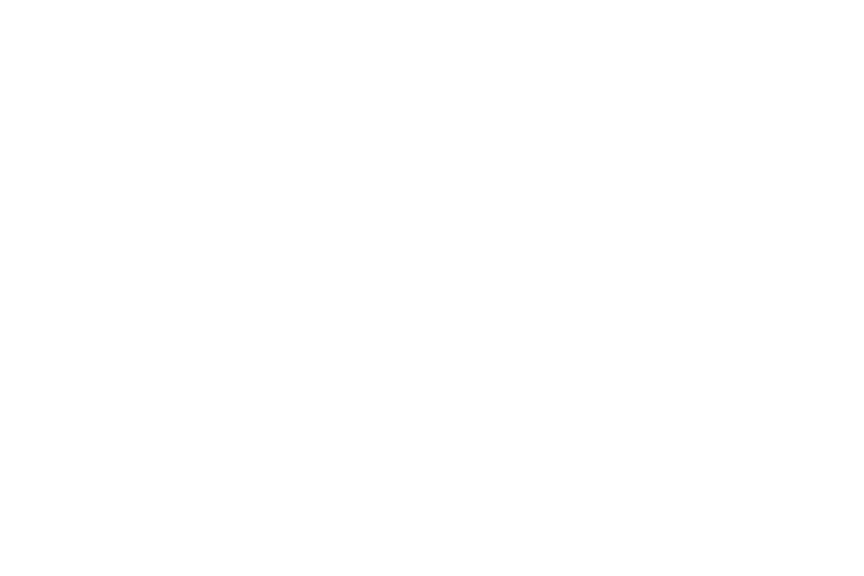

Text(0.5, 1.0, 'Systematically smooth and noisy pixel brightness vs frequency')

In [79]:
plt.figure()
for i in range(500):
    plt.loglog(freqs, diff_blurry_noisy_data_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel(r"$I_{\rm RMS}$ ($\mu K_{\rm RJ}$)", fontsize = 15)
plt.title('Systematically smooth and noisy pixel brightness vs frequency', fontsize = 10)

In [80]:
np.savez('diff_blurry_noisy_data_2.npz', diff_blurry_noisy_data_2)

Here are several gaps in the data

In [81]:
frqs = [0.01, 0.22, 0.35, 0.88, 1.89, 2.56, 13.23, 24.44]

<IPython.core.display.Javascript object>


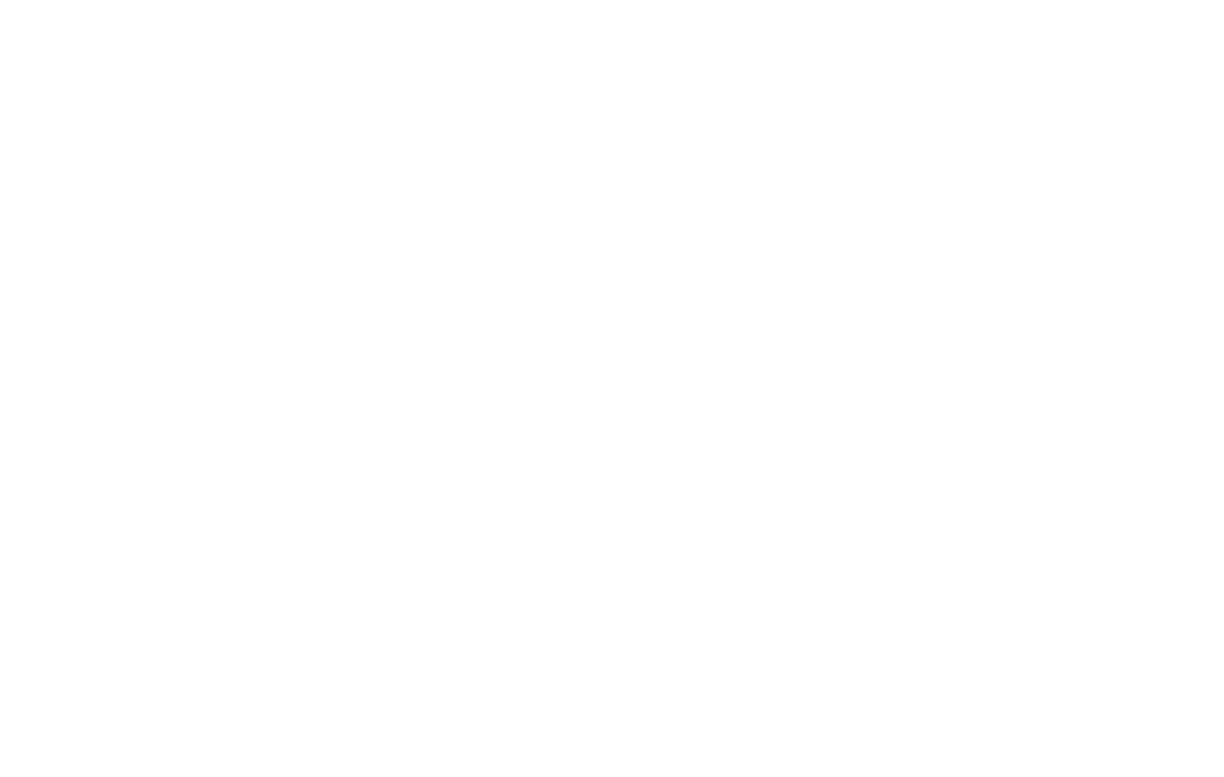

In [82]:
vec1 = hp.ang2vec(np.pi / 2, 0) 
ipix_disc1 = hp.query_disc(nside = 512, vec = vec1, radius = np.radians(5))
m1 = np.arange(npix)
m1[ipix_disc1] = m1.max()
hp.mollview(m1, cmap = 'inferno') 

In [83]:
vec2 = hp.ang2vec(np.pi / 6, np.pi / 3) 
ipix_disc2 = hp.query_disc(nside = 512, vec = vec2, radius = np.radians(15))
vec3 = hp.ang2vec(3 * np.pi / 8, 1.11) 
ipix_disc3 = hp.query_disc(nside = 512, vec = vec3, radius = np.radians(22))
vec4 = hp.ang2vec(2.33, 3) 
ipix_disc4 = hp.query_disc(nside = 512, vec = vec4, radius = np.radians(18))
vec5 = hp.ang2vec(0.45, 0.99) 
ipix_disc5 = hp.query_disc(nside = 512, vec = vec5, radius = np.radians(3))
vec6 = hp.ang2vec(1, 1) 
ipix_disc6 = hp.query_disc(nside = 512, vec = vec6, radius = np.radians(23.7))
vec7 = hp.ang2vec(.88, 2.45) 
ipix_disc7 = hp.query_disc(nside = 512, vec = vec7, radius = np.radians(5.5))
vec8 = hp.ang2vec(0, 0) 
ipix_disc8 = hp.query_disc(nside = 512, vec = vec8, radius = np.radians(13))
vec9 = hp.ang2vec(2 * np.pi / 3, 0.35) 
ipix_disc9 = hp.query_disc(nside = 512, vec = vec9, radius = np.radians(8.9))
vec10 = hp.ang2vec(2.45, .88) 
ipix_disc10 = hp.query_disc(nside = 512, vec = vec10, radius = np.radians(11))

In [84]:
d1 = translate_to_galactic(ipix_disc1, 512)
d2 = translate_to_galactic(ipix_disc2, 512)
d3 = translate_to_galactic(ipix_disc3, 512)
d4 = translate_to_galactic(ipix_disc4, 512)
d5 = translate_to_galactic(ipix_disc5, 512)
d6 = translate_to_galactic(ipix_disc6, 512)
d7 = translate_to_galactic(ipix_disc7, 512)
d8 = translate_to_galactic(ipix_disc8, 512)
d9 = translate_to_galactic(ipix_disc9, 512)
d10 = translate_to_galactic(ipix_disc10, 512)

[(array([8.78906250e-02, 2.63671875e-01, 4.39453125e-01, ...,
       3.59560547e+02, 3.59736328e+02, 3.59912109e+02]), array([ 4.92993694,  4.92993694,  4.92993694, ..., -4.92993694,
       -4.92993694, -4.92993694]))]
[(array([57.89634146, 58.44512195, 58.99390244, ..., 62.28601253,
       62.47390397, 62.66179541]), array([74.97216337, 74.97216337, 74.97216337, ..., 45.09276363,
       45.09276363, 45.09276363]))]
[(array([63.37113402, 63.55670103, 63.74226804, ..., 64.16015625,
       64.3359375 , 64.51171875]), array([44.49893008, 44.49893008, 44.49893008, ...,  0.52223439,
        0.52223439,  0.52223439]))]
[(array([170.68359375, 170.859375  , 171.03515625, ..., 172.86407767,
       173.15533981, 173.44660194]), array([-25.53037799, -25.53037799, -25.53037799, ..., -61.47269657,
       -61.47269657, -61.47269657]))]
[(array([56.06854839, 56.43145161, 56.79435484, ..., 57.4437299 ,
       57.73311897, 58.02250804]), array([67.18972163, 67.18972163, 67.18972163, ..., 61.28410289,
 

<IPython.core.display.Javascript object>


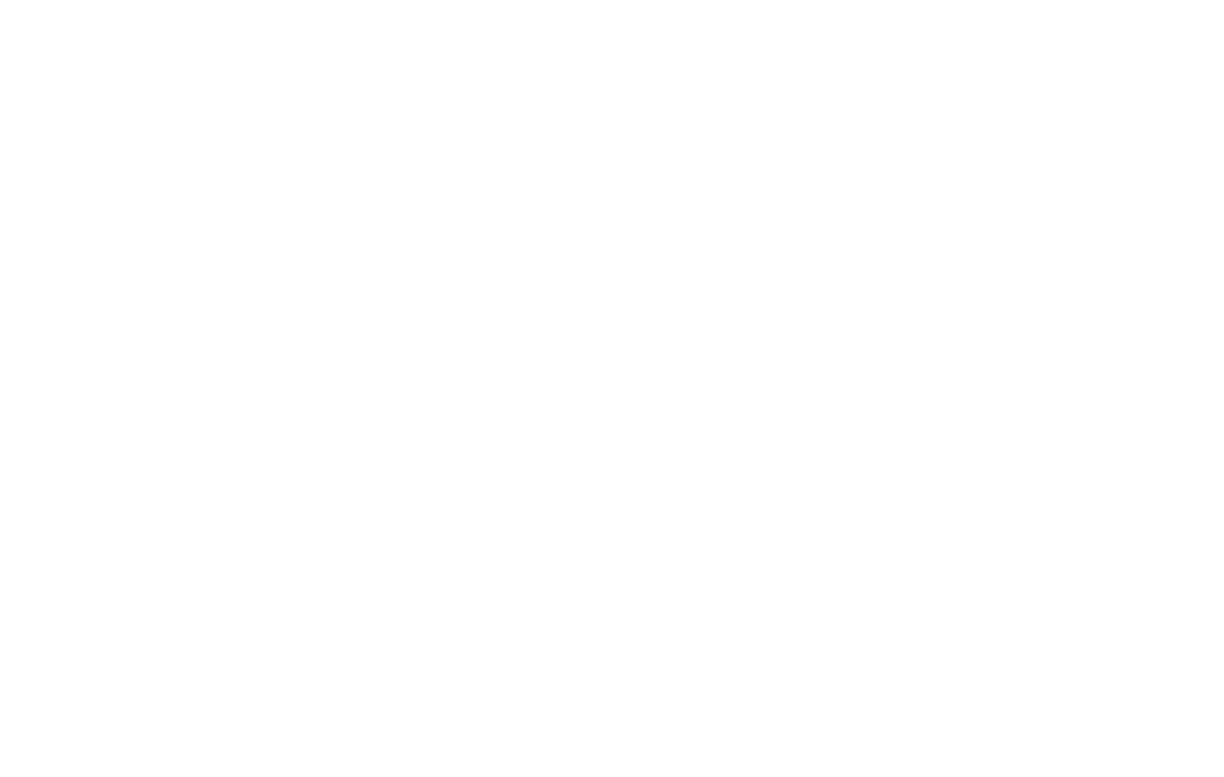

In [85]:
%matplotlib notebook
signal = sky.signal()(frqs)
signal[0, 0, d1] = 0
signal[0, 0, d2] = 0
signal[0, 0, d3] = 0
signal[0, 0, d4] = 0
signal[0, 0, d5] = 0
signal[0, 0, d6] = 0
signal[0, 0, d7] = 0
signal[0, 0, d8] = 0
signal[0, 0, d9] = 0
signal[0, 0, d10] = 0
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist')

In [86]:
print(ipix_disc1)
print(ipix_disc2)
print(ipix_disc3)
print(ipix_disc4)
print(ipix_disc5)
print(ipix_disc6)
print(ipix_disc7)

[1436672 1436673 1436674 ... 1709053 1709054 1709055]
[ 53569  53570  53571 ... 458255 458256 458257]
[ 469821  469822  469823 ... 1557869 1557870 1557871]
[2250699 2250700 2250701 ... 2954741 2954742 2954743]
[122666 122667 122668 ... 193018 193019 193020]
[ 263034  263035  263036 ... 1324366 1324367 1324368]
[460582 460583 460584 ... 689954 689955 689956]


In [87]:
dat1 = sky_read(d1, sky.signal()(frqs), frqs)
dat2 = sky_read(d2, sky.signal()(frqs), frqs)
dat3 = sky_read(d3, sky.signal()(frqs), frqs)
dat4 = sky_read(d4, sky.signal()(frqs), frqs)
dat5 = sky_read(d5, sky.signal()(frqs), frqs)
dat6 = sky_read(d6, sky.signal()(frqs), frqs)
dat7 = sky_read(d7, sky.signal()(frqs), frqs)

In [88]:
intensity = []
new_intensity = []
r_intensity = []
intensity1 = []
for a in range(len(frqs)):
    intensity.append(signal[a, 0, :])
new_intensity.append(np.reshape(intensity, (-1, npix)))
for i in range(npix):
    for m in range(len(frqs)):
        intensity1.append(new_intensity[0][m][i])
r_intensity.append(np.reshape(intensity1, (-1, len(frqs))))

In [89]:
sig = sky.signal()(frqs)

In [90]:
t = r_intensity[0]

In [91]:
t[d1] = 0
t[d2] = 0
t[d3] = 0
t[d4] = 0
t[d5] = 0
t[d6] = 0
t[d7] = 0
t[d8] = 0
t[d9] = 0
t[d10] = 0

In [92]:
h = t.astype('float')

In [93]:
type(h)

numpy.ndarray

In [94]:
h[h == 0] = 'nan'

In [95]:
np.savez('data_with_gaps.npz', h)

<IPython.core.display.Javascript object>


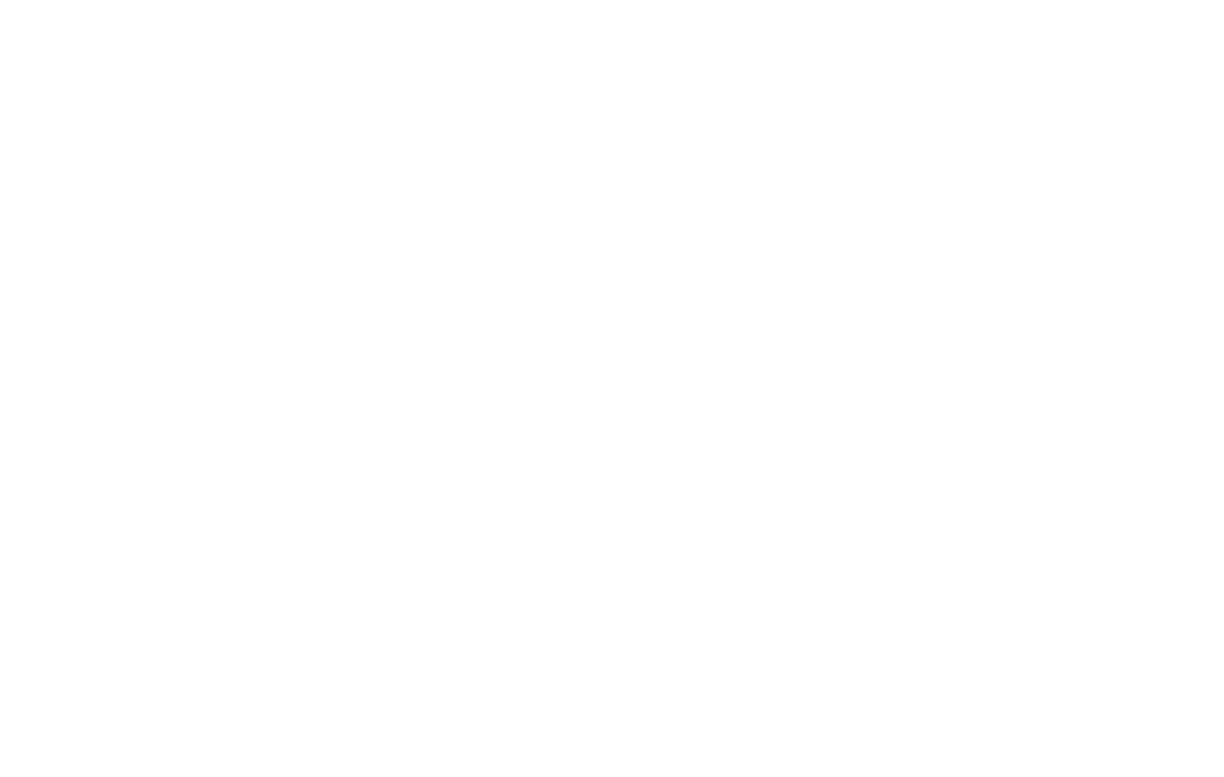

In [96]:
signal = sky.signal()(freqs)
hp.mollview(signal[0, 0, :], cmap = 'inferno', norm = 'hist', title = 'Map of the sky at 10 MHz')
#This is just a map at 10 MHz

Now we're starting to compare the interpolated data with the simulated data

In [97]:
w = np.load('2freq_2pc_2.npz')
#the data Iman interpolated

In [98]:
z = w['arr_0']

In [99]:
a = np.load('2freq_corr1pc_2.npz')

In [100]:
b = a['arr_0']

In [101]:
c = []
d = []
for i in range(11703):
    for m in range(len(fr)):
        c.append(np.abs((z[i][m] - data_2_freqs_2[i][m]) / data_2_freqs_2[i][m]) * 100)
d.append(np.reshape(c, (-1, len(fr))))
per_lin = d[0]

<IPython.core.display.Javascript object>


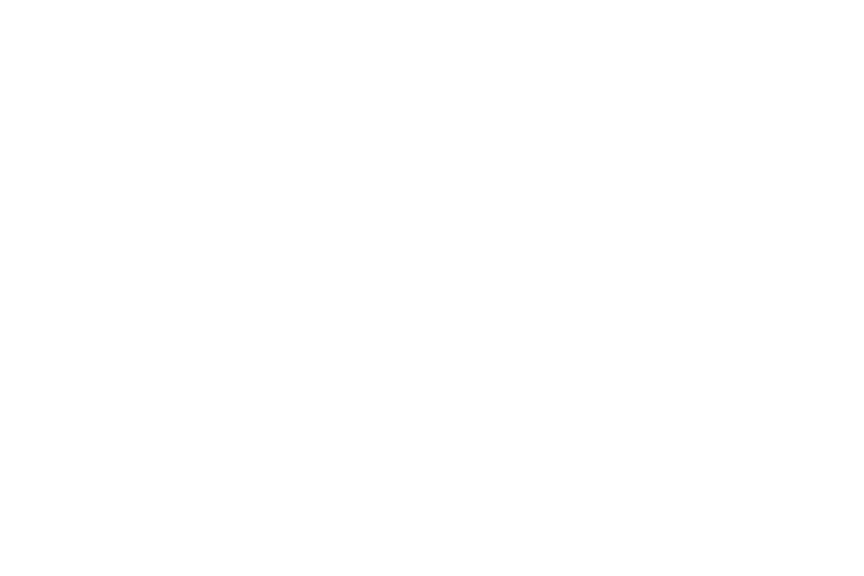

Text(0.5, 1.0, 'Percent error 2pc 2 vs frequency')

In [102]:
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_lin[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 2pc 2 vs frequency', fontsize = 10)

In [103]:
e = []
g = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        e.append(np.abs((b[i][m] - data_2_freqs_2[i][m]) / data_2_freqs_2[i][m]) * 100)
g.append(np.reshape(e, (-1, len(fr))))
h = g[0]

<IPython.core.display.Javascript object>


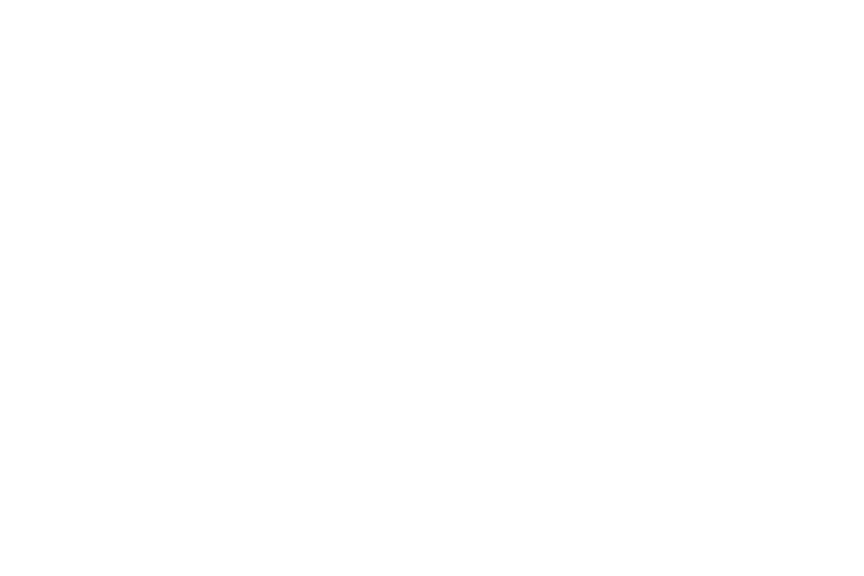

Text(0.5, 1.0, 'Percent error correlated 1pc 2 vs frequency')

In [104]:
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, h[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 1pc 2 vs frequency', fontsize = 10)

In [105]:
r = np.load('predicted_2frq_cub.npz')

In [106]:
pred_cub = r["arr_0"]

In [107]:
k = []
j = []
for i in range(11704):
    for m in range(len(fr)):
        k.append((np.abs((pred_cub[i][m] - data_2_freqs[i][m])) / data_2_freqs[i][m]) * 100)
j.append(np.reshape(k, (-1, len(fr))))
per_cub = j[0]

<IPython.core.display.Javascript object>


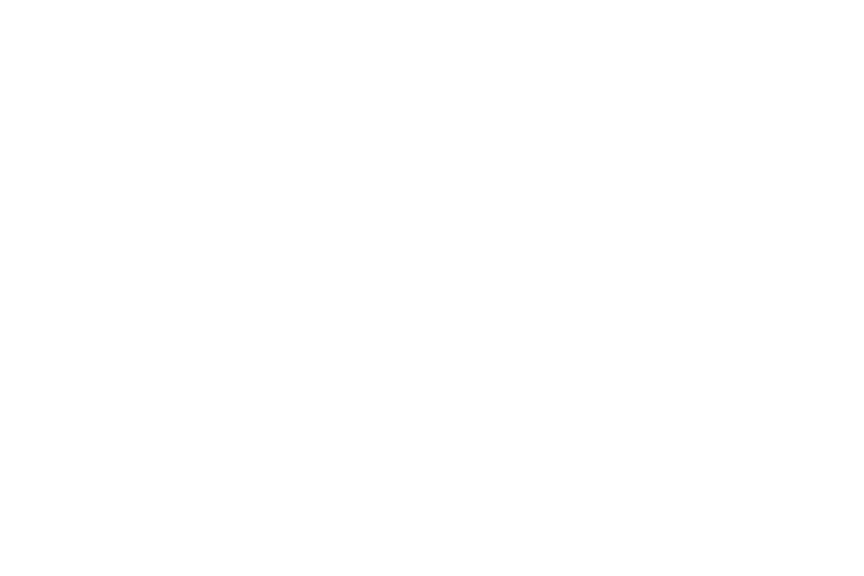

Text(0.5, 1.0, 'Percent error cubic vs frequency')

In [108]:
plt.figure()
for i in range(5000):
    plt.plot(xnew_uniform_log, per_cub[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error cubic vs frequency', fontsize = 10)

In [109]:
s = np.load('predicted_2frq_cub_2.npz')

In [110]:
pred_cub_2 = s['arr_0']

In [111]:
n = []
mo = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        n.append((np.abs((pred_cub_2[i][m] - data_2_freqs_2[i][m])) / data_2_freqs_2[i][m]) * 100)
mo.append(np.reshape(n, (-1, len(fr))))
per_cub_2 = mo[0]

<IPython.core.display.Javascript object>


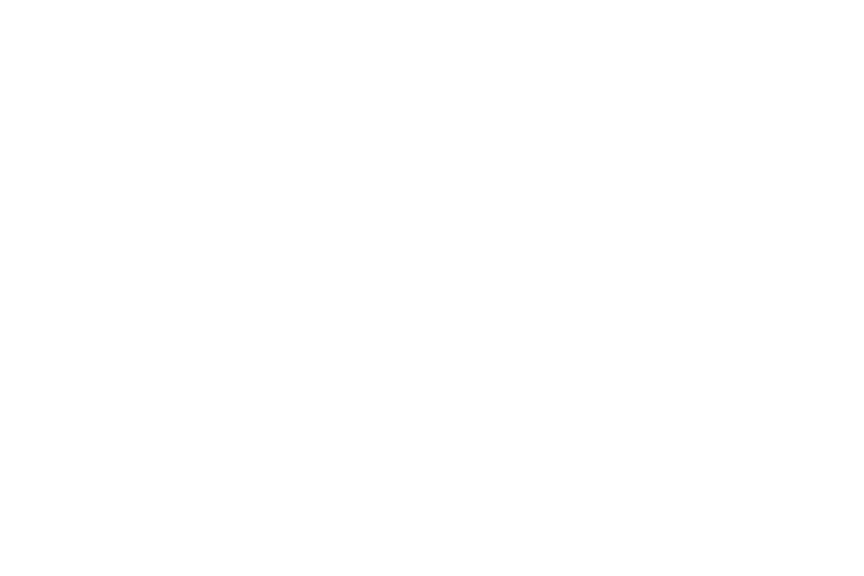

Text(0.5, 1.0, 'Percent error cubic 2 vs frequency')

In [112]:
plt.figure()
for i in range(5000):
    plt.plot(xnew_uniform_log, per_cub_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error cubic 2 vs frequency', fontsize = 10)

In [113]:
signal = sky.signal()(fr)

In [114]:
for i in range(len(pixs_2freq_2)):
    signal[50][0][pred_cub_2[i]] = b[i][50]

IndexError: arrays used as indices must be of integer (or boolean) type

<IPython.core.display.Javascript object>


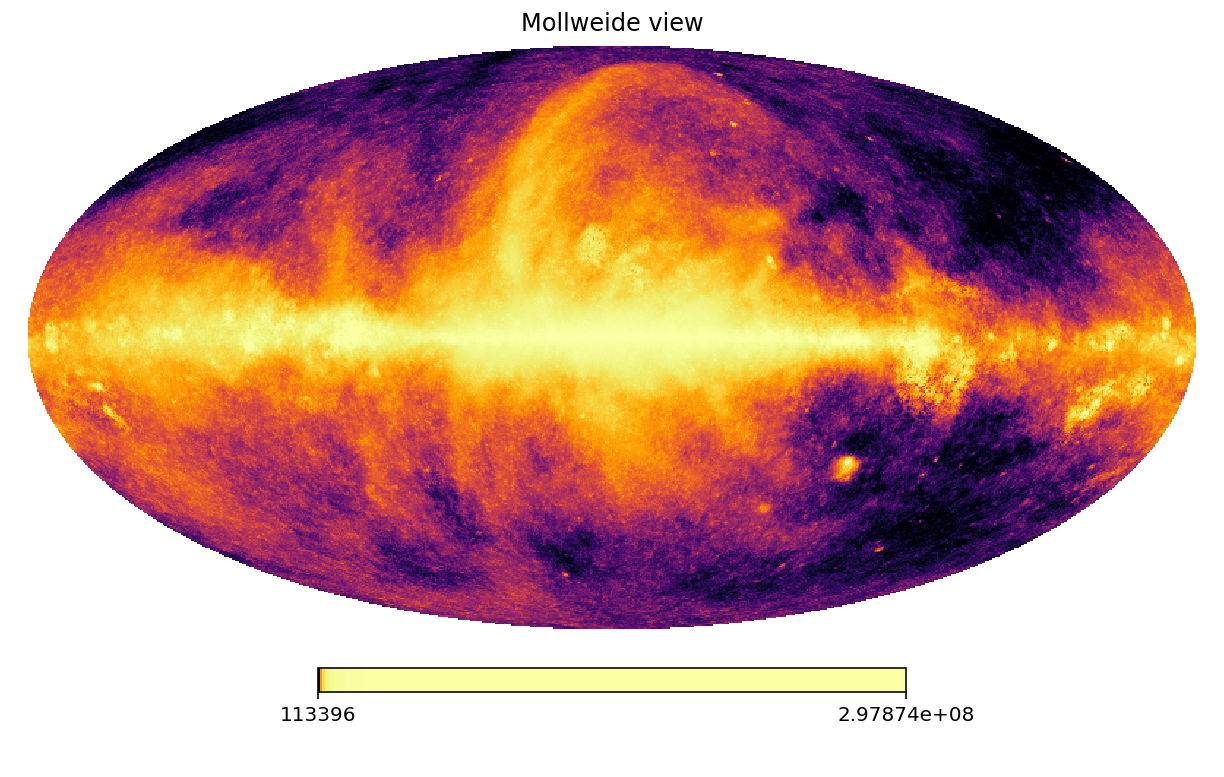

In [115]:
hp.mollview(signal[50, 0, :], cmap = 'inferno', norm = 'hist')
#mollweide plot with 2freq_corr1pc_2

In [117]:
for m in range(pixs_2freq):
    signal[50][0][pred_cub[i]] = z[i][50]

TypeError: only integer scalar arrays can be converted to a scalar index

<IPython.core.display.Javascript object>


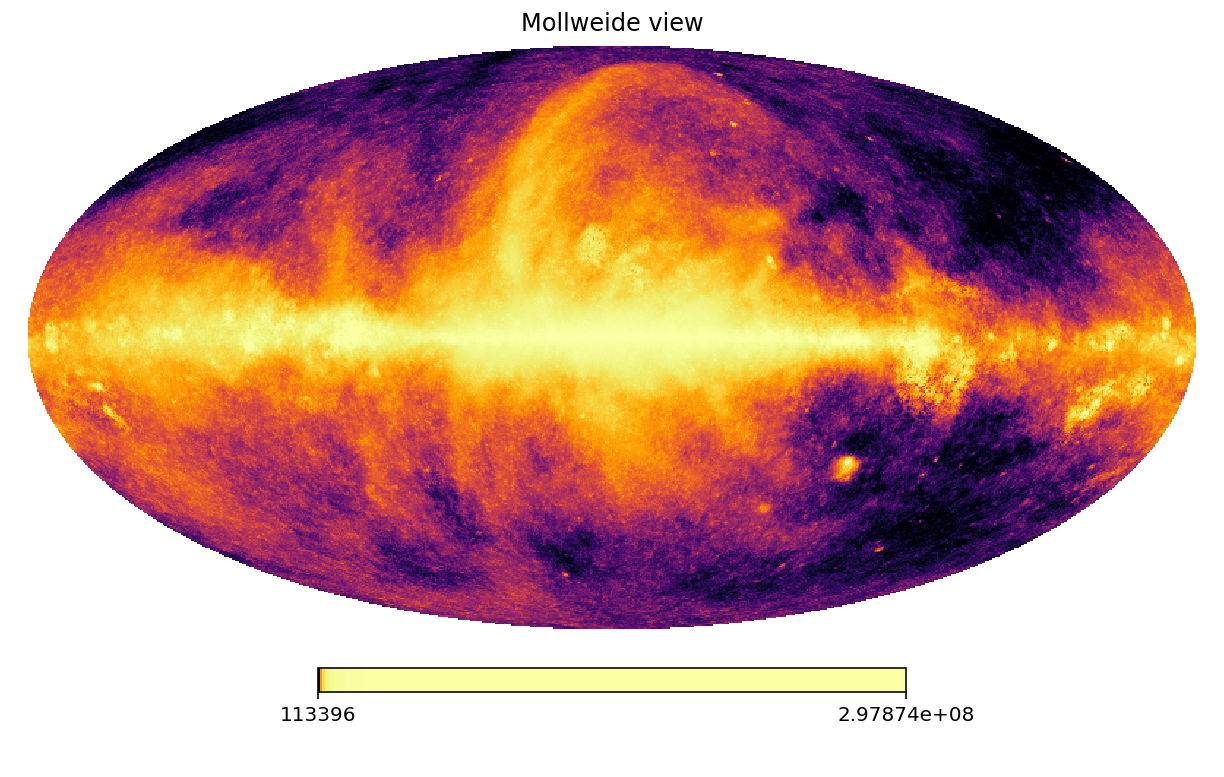

In [118]:
hp.mollview(signal[50, 0, :], cmap = 'inferno', norm = 'hist')
#mollweide plot with 2freq_2pc_2

In [119]:
a = np.load('predict_corr.npz')

In [120]:
pred_corr = a['arr_0']

In [145]:
c = np.load('predict_corr_2.npz')
pred_corr_2 = np.array(c['arr_0'])

In [122]:
d = np.load('2freq_2pc.npz')
pred_2freq_twopc = np.array(d['arr_0'])

In [123]:
e = np.load('predict_twopc_2.npz')
pred_twopc_2 = np.array(e['arr_0'])

In [124]:
ff = np.load('2freq_corr1pc.npz')
pred_2freq_corr1pc = ff['arr_0']

In [125]:
nod = []
moda = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        nod.append((np.abs((pred_2freq_corr1pc[i][m] - data_2_freqs[i][m])) / data_2_freqs[i][m]) * 100)
moda.append(np.reshape(nod, (-1, len(fr))))
per_2freq_corr1pc = moda[0]

<IPython.core.display.Javascript object>


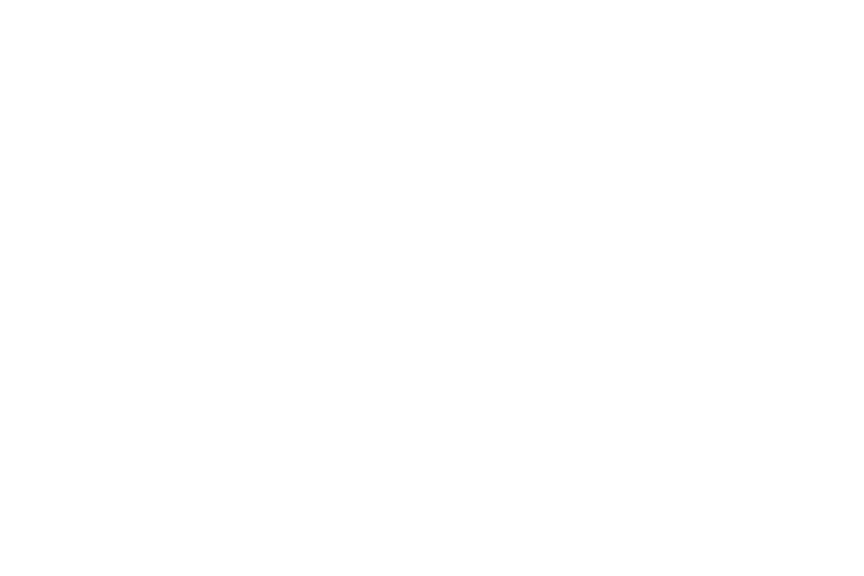

Text(0.5, 1.0, 'Percent error correlated and 1pc vs frequency')

In [126]:
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_2freq_corr1pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated and 1pc vs frequency', fontsize = 10)

In [127]:
no = []
mod = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        no.append((np.abs((pred_corr[i][m] - data_2_freqs[i][m])) / data_2_freqs[i][m]) * 100)
mod.append(np.reshape(no, (-1, len(fr))))
per_corr = mod[0]

<IPython.core.display.Javascript object>


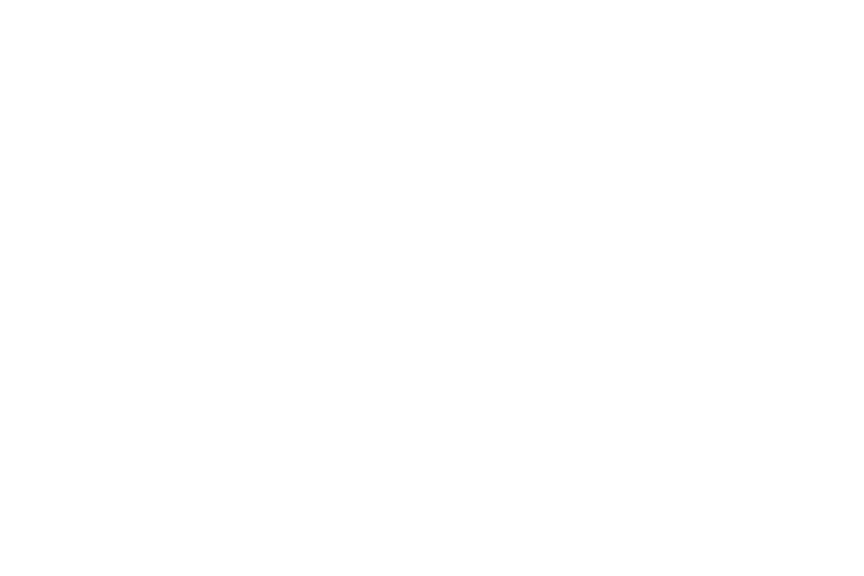

Text(0.5, 1.0, 'Percent error correlated vs frequency')

In [128]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_corr[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated vs frequency', fontsize = 10)

In [146]:
nd = []
mob = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        nd.append((np.abs((pred_corr_2[i][m] - data_2_freqs_2[i][m])) / data_2_freqs_2[i][m]) * 100)
mob.append(np.reshape(nd, (-1, len(fr))))
per_corr_2 = mob[0]

<IPython.core.display.Javascript object>


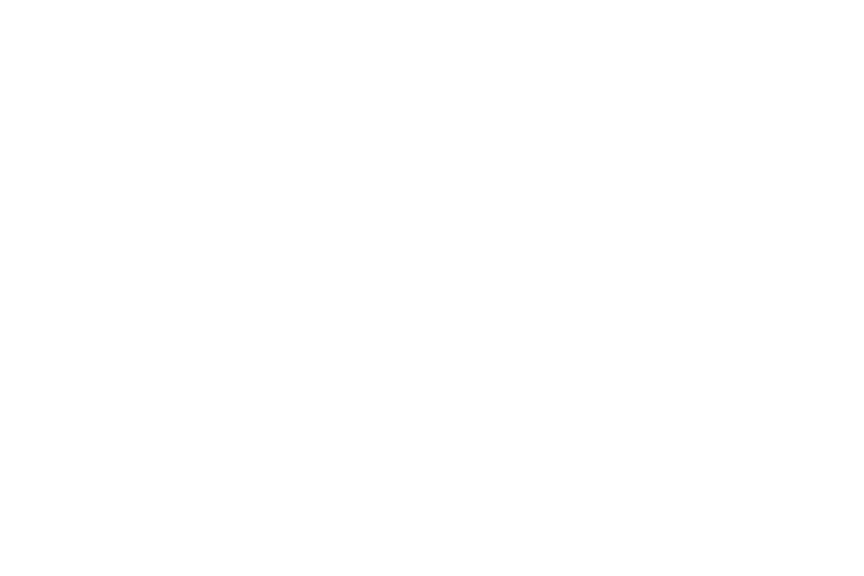

Text(0.5, 1.0, 'Percent error correlated 2 vs frequency')

In [147]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_corr_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 2 vs frequency', fontsize = 10)

In [213]:
na = []
mop = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        na.append((np.abs((pred_2freq_twopc[i][m] - data_2_freqs[i][m])) / data_2_freqs[i][m]) * 100)
mop.append(np.reshape(na, (-1, len(fr))))
per_2freq_twopc = mop[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


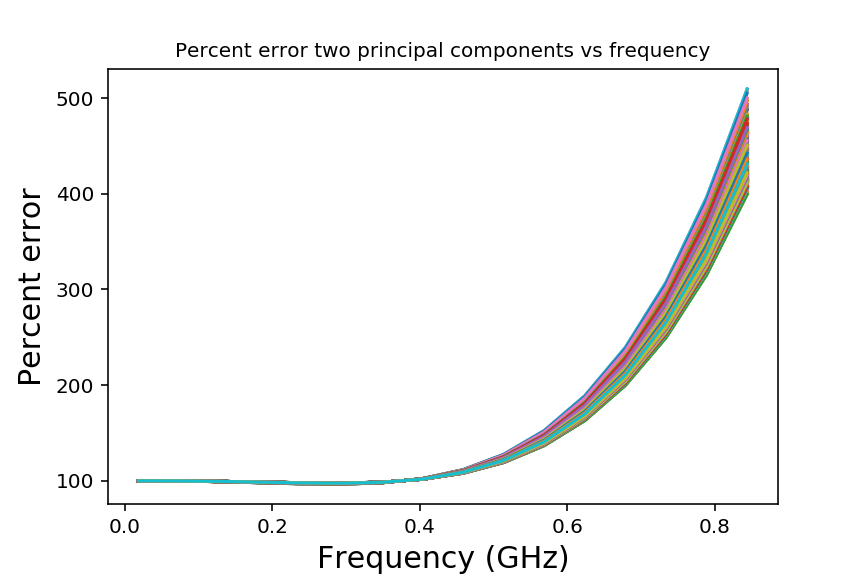

Text(0.5, 1.0, 'Percent error two principal components vs frequency')

In [214]:
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_2freq_twopc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error two principal components vs frequency', fontsize = 10)

In [149]:
ne = []
moe = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        ne.append((np.abs((pred_twopc_2[i][m] - data_2_freqs_2[i][m])) / data_2_freqs_2[i][m]) * 100)
moe.append(np.reshape(ne, (-1, len(fr))))
per_twopc_2 = moe[0]

<IPython.core.display.Javascript object>


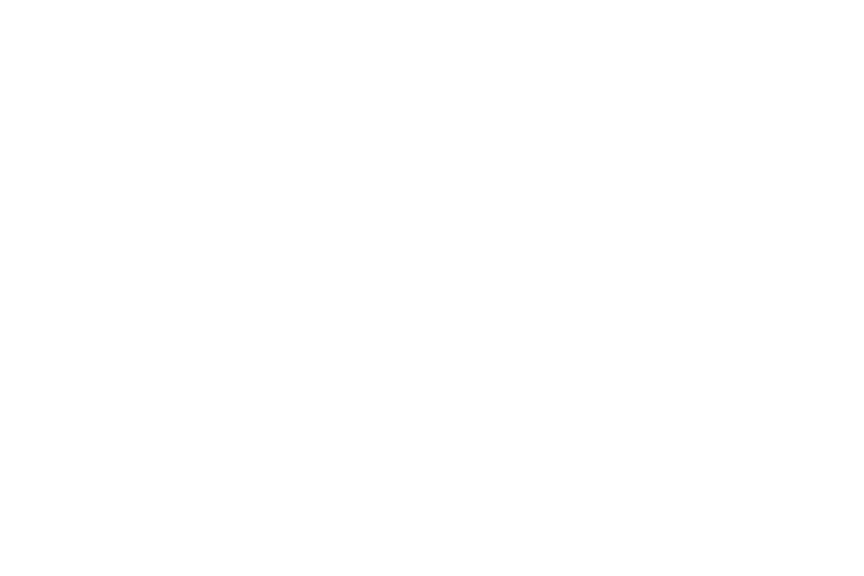

Text(0.5, 1.0, 'Percent error two principal components 2 vs frequency')

In [150]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_twopc_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error two principal components 2 vs frequency', fontsize = 10)

In [151]:
h = np.load('corr_twopc.npz')

In [152]:
pred_corr_pc = h['arr_0']

In [153]:
j = np.load('corr_twopc_2.npz')

In [154]:
pred_corr_pc_2 = j['arr_0']

In [155]:
nr = []
mor = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        nr.append((np.abs((pred_corr_pc[i][m] - data_2_freqs[i][m])) / data_2_freqs[i][m]) * 100)
mor.append(np.reshape(nr, (-1, len(fr))))
per_corr_pc = mor[0]

<IPython.core.display.Javascript object>


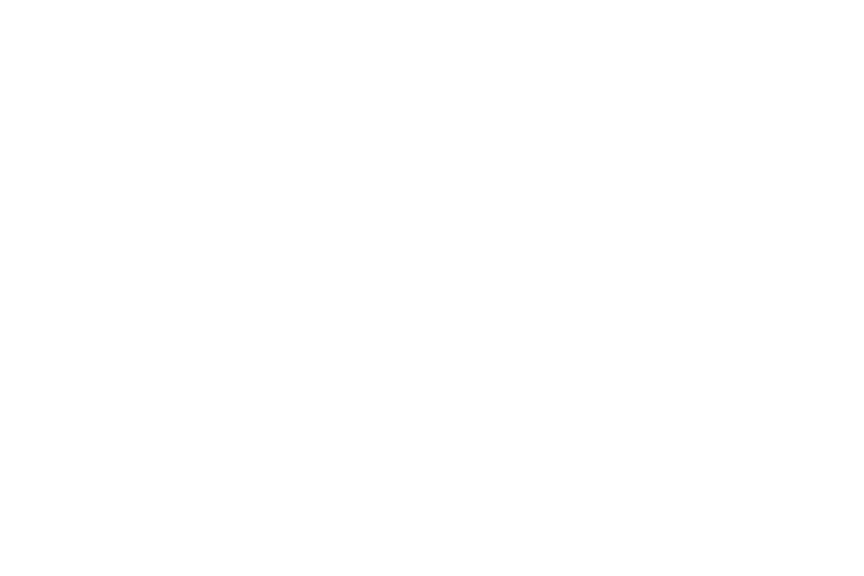

Text(0.5, 1.0, 'Percent error correlated and two principal components vs frequency')

In [156]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_corr_pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated and two principal components vs frequency', fontsize = 10)

In [220]:
burr = []
nog = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        burr.append((np.abs((pred_corr_pc_2[i][m] - data_2_freqs_2[i][m])) / data_2_freqs_2[i][m]) * 100)
nog.append(np.reshape(burr, (-1, len(fr))))
per_corr_pc_2 = nog[0]

In [221]:
np.shape(pred_corr_pc_2)

(23980, 100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


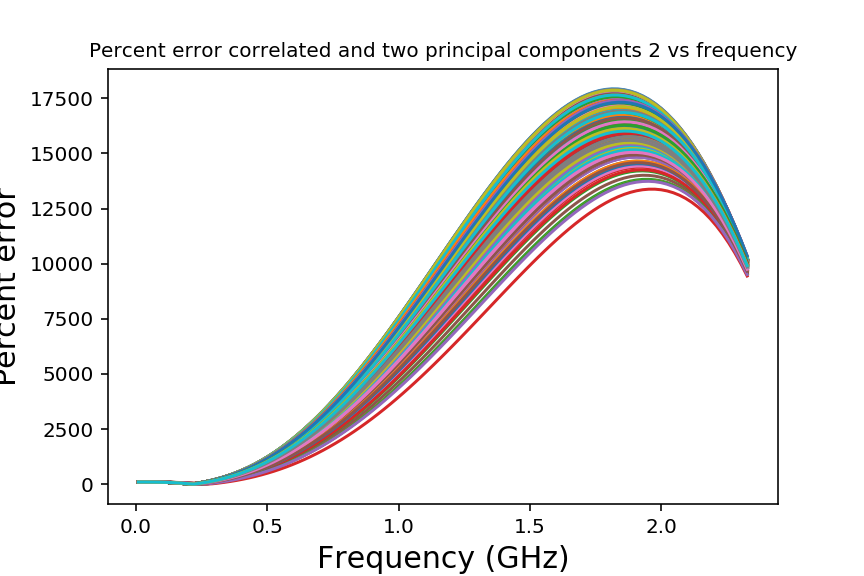

Text(0.5, 1.0, 'Percent error correlated and two principal components 2 vs frequency')

In [223]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_corr_pc_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated and two principal components 2 vs frequency', fontsize = 10)

These are the chi-squared test for the graphs above, but we didn't end up using them because of the gaps

In [226]:
cu = []
cub = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        cu.append(((pred_cub[i][m] - data_2_freqs[i][m]) ** 2) / data_2_freqs[i][m])
cub.append(np.reshape(cu, (-1, len(fr))))
t = cub[0]

In [227]:
chi_sq_cub = np.sum(t)

In [228]:
cu2 = []
cub_2 = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        cu2.append(((pred_cub_2[i][m] - data_2_freqs_2[i][m]) ** 2) / data_2_freqs_2[i][m])
cub_2.append(np.reshape(cu2, (-1, len(fr))))
r = cub_2[0]

In [229]:
chi_sq_cub_2 = np.sum(r)

In [230]:
c = []
corr = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        c.append(((pred_corr[i][m] - data_2_freqs[i][m]) ** 2) / data_2_freqs[i][m])
corr.append(np.reshape(c, (-1, len(fr))))
w = corr[0]

In [231]:
chi_sq_corr = np.sum(w)

In [232]:
c2 = []
corr_2 = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        c2.append(((pred_corr_2[i][m] - data_2_freqs_2[i][m]) ** 2) / data_2_freqs_2[i][m])
corr_2.append(np.reshape(c2, (-1, len(fr))))
p = corr_2[0]

In [233]:
chi_sq_corr_2 = np.sum(p)

In [234]:
pc = []
twopc = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        pc.append(((pred_2freq_twopc[i][m] - data_2_freqs[i][m]) ** 2) / data_2_freqs[i][m])
twopc.append(np.reshape(pc, (-1, len(fr))))
v = twopc[0]

In [235]:
chi_sq_twopc = np.sum(v)

In [236]:
pc2 = []
twopc_2 = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        pc2.append(((pred_twopc_2[i][m] - data_2_freqs_2[i][m]) ** 2) / data_2_freqs_2[i][m])
twopc_2.append(np.reshape(pc2, (-1, len(fr))))
k = twopc_2[0]

In [237]:
chi_sq_twopc_2 = np.sum(k)

In [238]:
cp = []
corr_pc = []
for i in range(len(pixs_2freq)):
    for m in range(len(fr)):
        cp.append(((pred_corr_pc_2[i][m] - data_2_freqs[i][m]) ** 2) / data_2_freqs[i][m])
corr_pc.append(np.reshape(cp, (-1, len(fr))))
s = corr_pc[0]

In [239]:
chi_sq_corr_pc = np.sum(s)

In [240]:
cp2 = []
corr_pc_2 = []
for i in range(len(pixs_2freq_2)):
    for m in range(len(fr)):
        cp2.append(((pred_corr_pc_2[i][m] - data_2_freqs_2[i][m]) ** 2) / data_2_freqs_2[i][m])
corr_pc_2.append(np.reshape(cp2, (-1, len(fr))))
r = corr_pc_2[0]

In [241]:
chi_sq_corr_pc_2 = np.sum(r)

In [242]:
d = sky_read(pixs_2freq, sky.signal()(freqs), freqs)

<IPython.core.display.Javascript object>


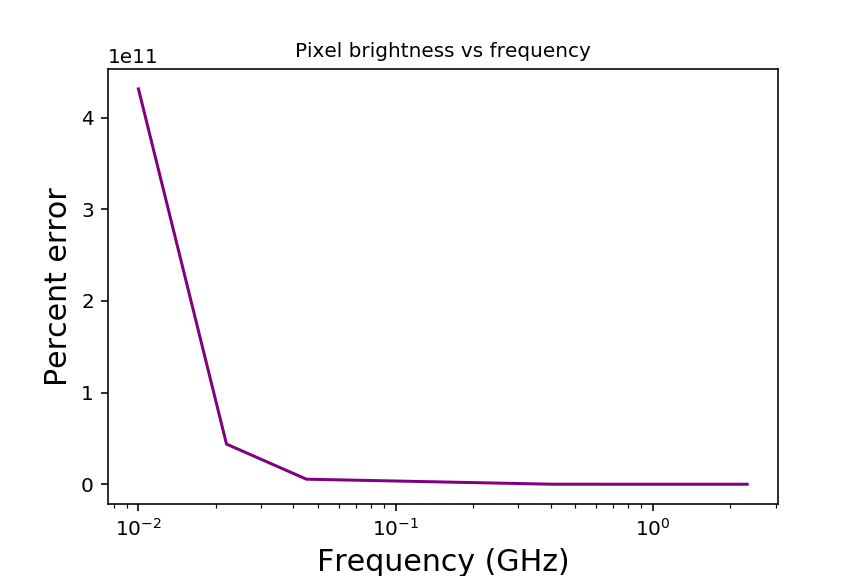

Text(0.5, 1.0, 'Pixel brightness vs frequency')

In [171]:
plt.figure()
plt.semilogx(freqs, d[0][999], color = 'purple')
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Pixel brightness vs frequency', fontsize = 10)

In [172]:
e = sky_read(pixs_2freq_2, sky.signal()(freqs), freqs)

<IPython.core.display.Javascript object>


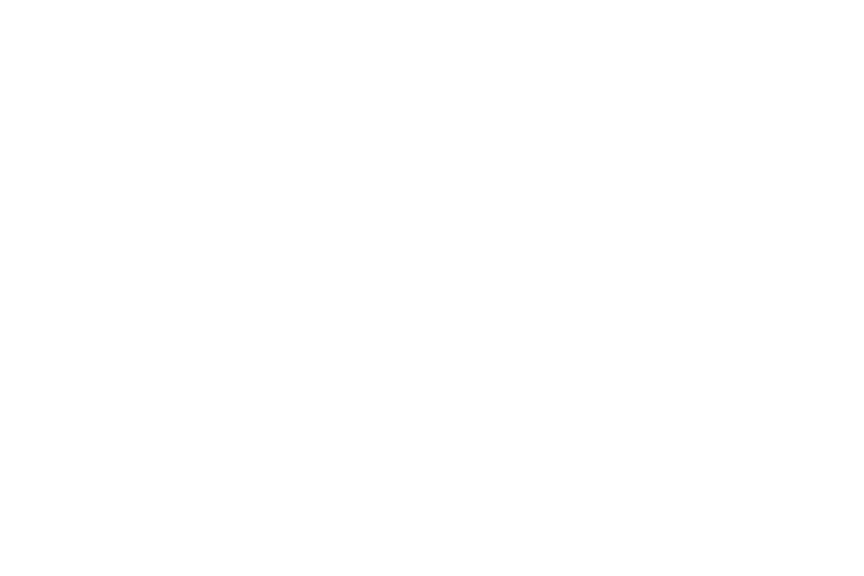

Text(0.5, 1.0, 'Pixel brightness 2 vs frequency')

In [173]:
plt.figure()
plt.semilogx(freqs, e[0][499], color = 'navy')
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Pixel brightness 2 vs frequency', fontsize = 10)

The 

In [174]:
ooo = find_pixel_numbers(512, 0, 360, -90, -28)

In [175]:
oo = translate_to_galactic(ooo, 512)

[(array([0.0000000e+00, 1.7578125e-01, 3.5156250e-01, ..., 1.3500000e+02,
       2.2500000e+02, 3.1500000e+02]), array([-28.03767743, -28.03767743, -28.03767743, ..., -89.90862927,
       -89.90862927, -89.90862927]))]


In [176]:
o = sky_read(oo[0], sky.signal()(xnew_uniform), xnew_uniform)

In [177]:
d_at_4 = o[0]

In [178]:
dat4 = [d_at_4[:, 2], d_at_4[:, 3], d_at_4[:, 4], d_at_4[:, 5]]

In [179]:
freqs4 = [freqs[2], freqs[3], freqs[4], freqs[5]]

In [180]:
freqs4_100 = np.linspace(0.045, 2.326, 100)

In [181]:
o_100 = sky_read(oo[0], sky.signal()(freqs4_100), freqs4_100)

In [182]:
dat_4_100 = o_100[0]

In [183]:
nnn = []
nn = []
for i in range(len(oo[0])):
    for m in range(4):
        nnn.append(dat4[m][i])
nn.append(np.reshape(nnn, (-1, 4)))

In [184]:
data_4_freqs = nn[0]
#Where 4 of the frequencies overlap

In [185]:
mmm = find_pixel_numbers(512, 0, 360, 74, 90)

In [186]:
mm = translate_to_galactic(mmm, 512)

[(array([ 45.        , 135.        , 225.        , ..., 358.70689655,
       359.22413793, 359.74137931]), array([89.90862927, 89.90862927, 89.90862927, ..., 74.05004302,
       74.05004302, 74.05004302]))]


In [187]:
m = sky_read(mm[0], sky.signal()(freqs), freqs)

In [188]:
d_at_4_2 = m[0]

In [189]:
dat4_2 = [d_at_4_2[:, 0], d_at_4_2[:, 1], d_at_4_2[:, 3], d_at_4_2[:, 4]]

In [190]:
lll = []
ll = []
for i in range(len(mm[0])):
    for m in range(4):
        lll.append(dat4_2[m][i])
ll.append(np.reshape(lll, (-1, 4)))

In [191]:
data_4_freqs_2 = ll[0]
#The other data where 4 of the frequencies overlap

In [192]:
np.shape(data_4_freqs_2)

(60900, 4)

In [193]:
signal = sky.signal()(freqs)

In [194]:
for i in range(len(mm[0])):
    signal[5, 0, mm[0][i]] = 0

In [195]:
for b in range(len(oo[0])):
    signal[5, 0, oo[0][b]] = 0

<IPython.core.display.Javascript object>


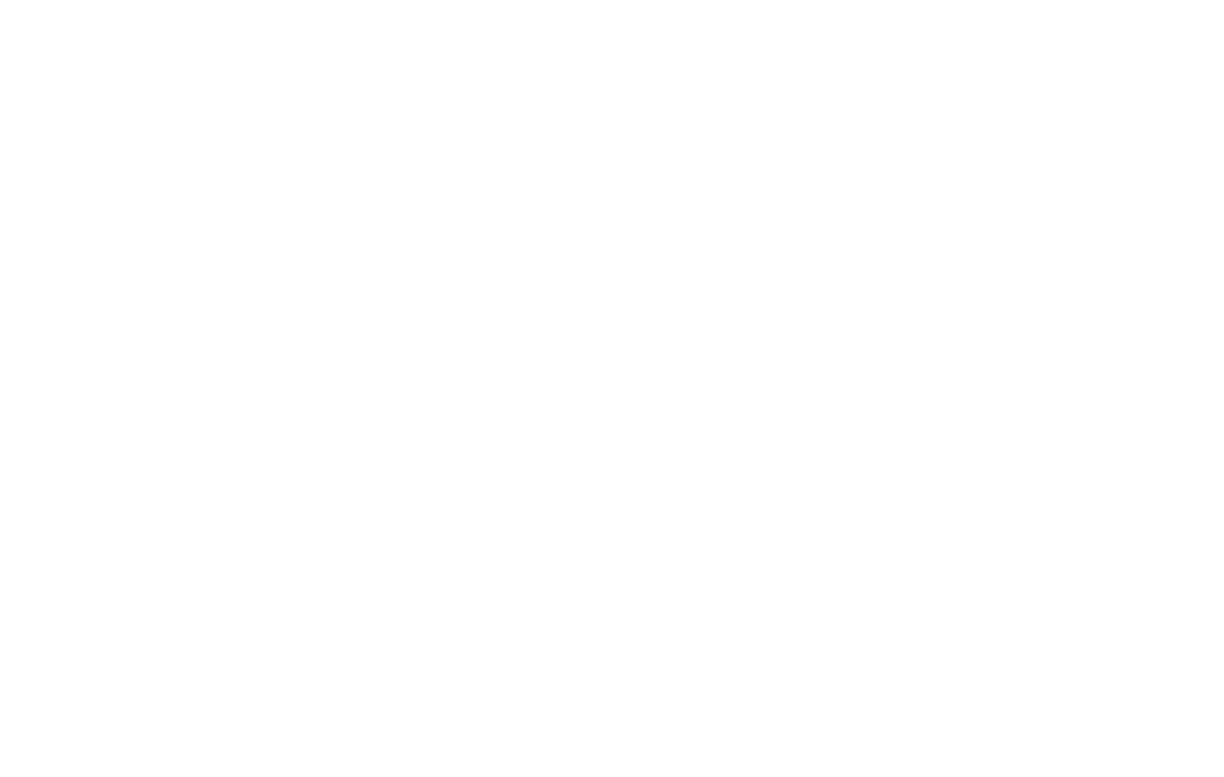

In [196]:
hp.mollview(signal[5, 0, :], cmap = 'inferno', norm = 'hist', title = 'Overlap of 4 frequenices')

In [197]:
np.savez('data_4_freqs.npz', data_4_freqs)

In [198]:
np.savez('data_4_freqs_2.npz', data_4_freqs_2)

In [199]:
r = np.load('diff_fit_onepc.npz')

In [200]:
pred_diff_onepc = r['arr_0']

In [201]:
f = np.load('diff_fit_twopc.npz')

In [202]:
pred_diff_twopc = f['arr_0']

In [203]:
g = np.load('diff_blurry_fit.npz')

In [204]:
pred_diff_blurry = g['arr_0']

In [205]:
q = np.load('sys_blurry_fit.npz')

In [243]:
pred_sys = ['arr_0']

In [206]:
dat = sky_read(ipix_disc, sky.signal()(xnew_uniform_log), xnew_uniform_log)

In [207]:
rrrr = []
ggg = []
for i in range(len(ipix_disc)):
    for m in range(len(fr)):
        rrrr.append((np.abs(pred_diff_onepc[i][m]- dat[0][i][m]) / dat[0][i][m]) * 100)
ggg.append(np.reshape(rrrr, (-1, len(fr))))
per_diff_onepc = ggg[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


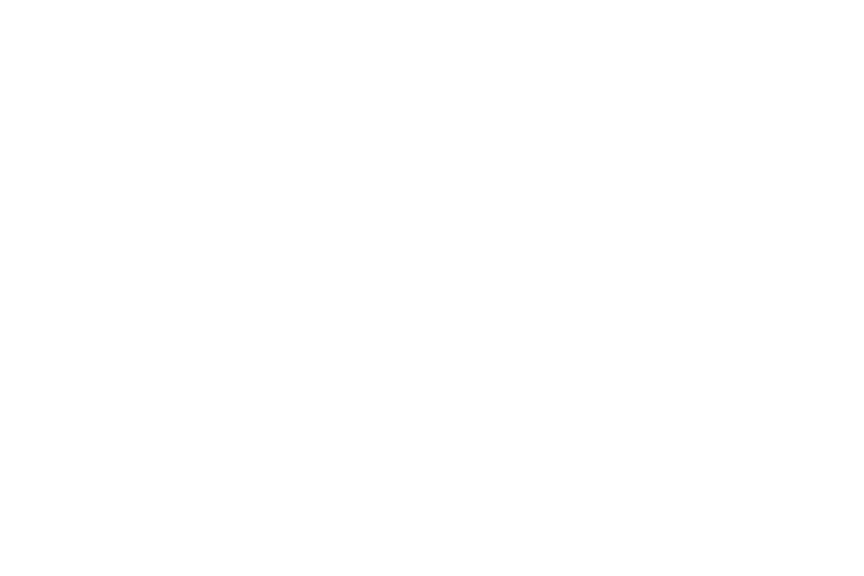

Text(0.5, 1.0, 'Percent error 1 pc vs frequency')

In [208]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_diff_onepc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 1 pc vs frequency', fontsize = 10)

In [209]:
rrr = []
gg = []
for i in range(len(ipix_disc)):
    for m in range(len(fr)):
        rrr.append((np.abs((pred_diff_twopc[i][m] - dat[0][i][m])) / dat[0][i][m]) * 100)
gg.append(np.reshape(rrr, (-1, len(fr))))
per_diff_twopc = gg[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


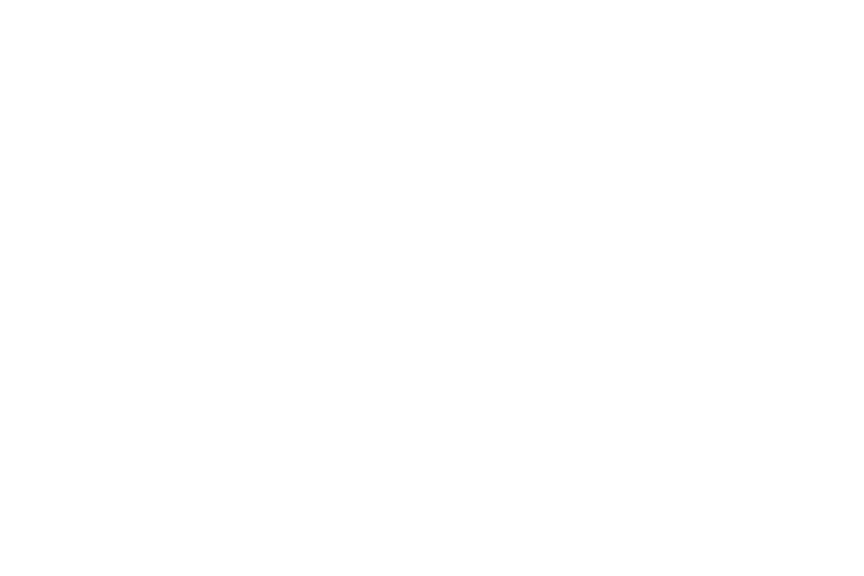

Text(0.5, 1.0, 'Percent error 2 pc vs frequency')

In [210]:
plt.figure()
for i in range(500):
    plt.plot(fr, per_diff_twopc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 2 pc vs frequency', fontsize = 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


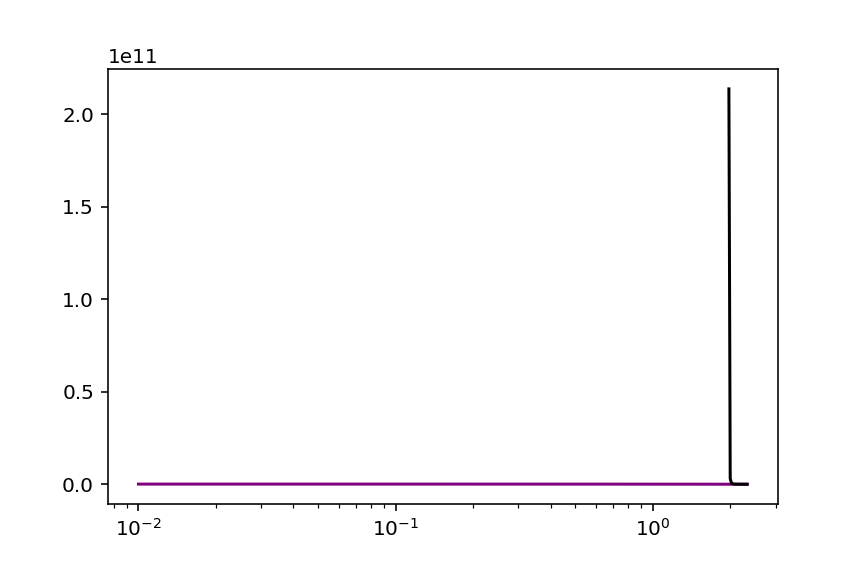

In [244]:
plt.figure()
plt.semilogx(fr, pred_2freq_twopc[0], color = 'purple')
plt.semilogx(fr, data_2_freqs[0], color = 'k')

In [245]:
r = np.load('clean_corr2pc.npz')

In [246]:
pred_clean_corr2pc = r['arr_0']

In [248]:
np.shape(pred_clean_corr2pc)

(145846, 100)

In [260]:
np.shape(data_overlap)

(1, 145846, 100)

In [257]:
data_overlap = sky_read(pix_all, sky.signal()(xnew_uniform), xnew_uniform)

In [262]:
ppp = []
ee = []
for i in range(len(ipix_disc)):
    for m in range(len(fr)):
        ppp.append((np.abs((pred_clean_corr2pc[i][m] - data_overlap[0][i][m])) / data_overlap[0][i][m]) * 100)
ee.append(np.reshape(ppp, (-1, len(fr))))
per_clean_corr2pc = ee[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


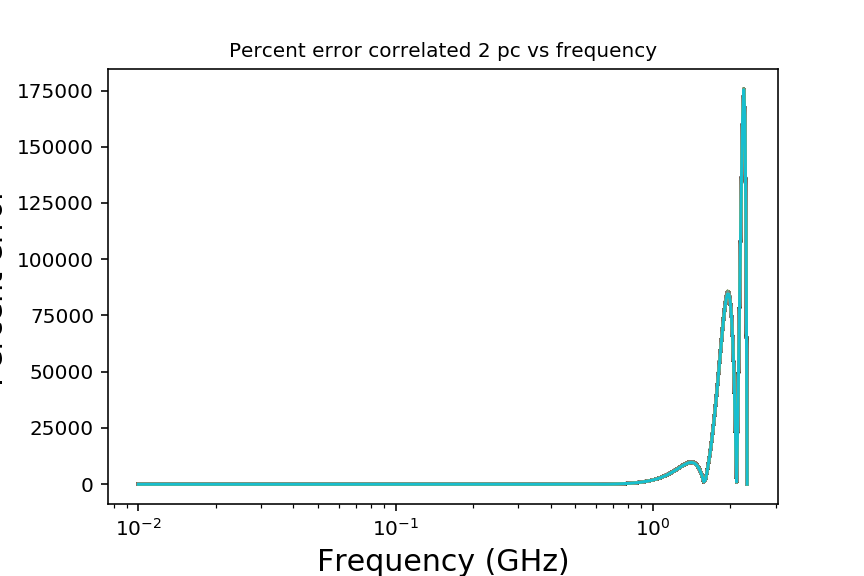

Text(0.5, 1.0, 'Percent error correlated 2 pc vs frequency')

In [263]:
plt.figure()
for i in range(500):
    plt.semilogx(fr, per_clean_corr2pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 2 pc vs frequency', fontsize = 10)

Here, I started using the same frequencies as Iman

In [254]:
xnew_uniform = np.geomspace(0.01,2.326,100)
xnew_uniform_log = np.log(xnew_uniform)

In [255]:
hggg = np.load('overlap_1pc_lin.npz')

In [256]:
pred_1pc_lin = hggg['arr_0']

In [258]:
eeee = []
rrrr = []
for i in range(len(ipix_disc)):
    for m in range(len(fr)):
        eeee.append((np.abs((pred_1pc_lin[i][m] - data_overlap[0][i][m])) / data_overlap[0][i][m]) * 100)
rrrr.append(np.reshape(eeee, (-1, len(fr))))
per_clean_corr2pc = rrrr[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


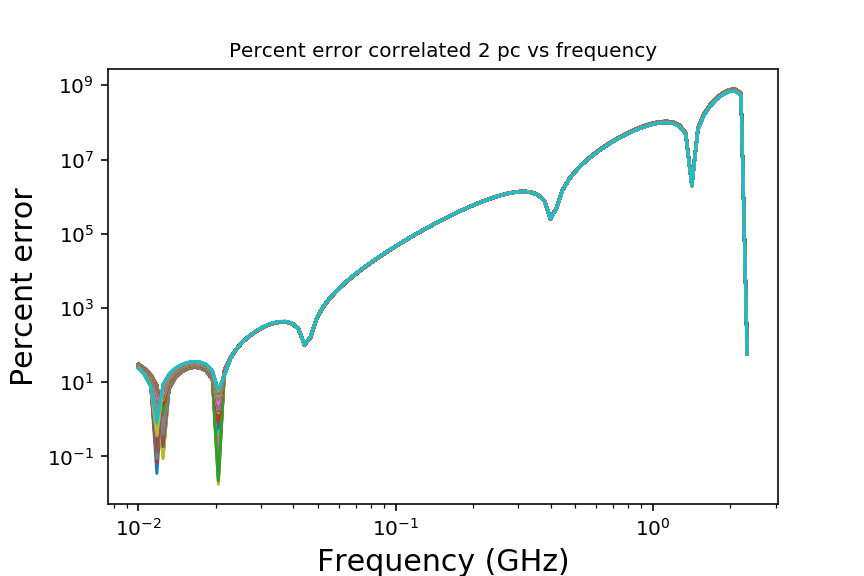

Text(0.5, 1.0, 'Percent error correlated 2 pc vs frequency')

In [259]:
plt.figure()
for o in range(500):
    plt.loglog(xnew_uniform, per_clean_corr2pc[o])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 2 pc vs frequency', fontsize = 10)

In [265]:
data_4_freq_log = sky_read(oo[0], sky.signal()(xnew_uniform_log), xnew_uniform_log)

In [266]:
data_4_freq_2_log = sky_read(mm[0], sky.signal()(xnew_uniform_log), xnew_uniform_log)

In [267]:
a = np.load('four_freq_1pc.npz')
pred_4_freq_1pc = a['arr_0']

In [269]:
eeeee = []
rrrrr = []
for i in range(len(oo[0])):
    for m in range(len(xnew_uniform_log)):
        eeeee.append((np.abs((pred_4_freq_1pc[i][m] - data_4_freq_log[0][i][m])) / data_4_freq_log[0][i][m]) * 100)
rrrrr.append(np.reshape(eeeee, (-1, len(xnew_uniform_log))))
per_4_1pc = rrrrr[0]

Text(0.5, 1.0, 'Percent error 4 frequencies 1 pc vs frequency')

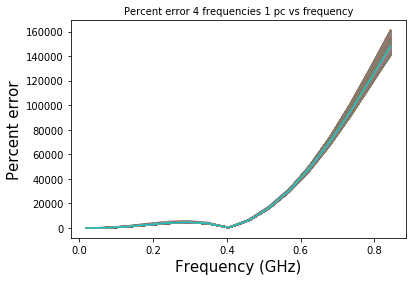

In [270]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_4_1pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 4 frequencies 1 pc vs frequency', fontsize = 10)

In [271]:
b = np.load('four_freq_1pc_2.npz')
pred_4_freq_1pc_2 = b['arr_0']

In [272]:
bbbb = []
bbb = []
for i in range(len(mm[0])):
    for m in range(len(xnew_uniform_log)):
        bbbb.append((np.abs((pred_4_freq_1pc_2[i][m] - data_4_freq_2_log[0][i][m])) / data_4_freq_2_log[0][i][m]) * 100)
bbb.append(np.reshape(bbbb, (-1, len(xnew_uniform_log))))
per_4_1pc_2 = bbb[0]

Text(0.5, 1.0, 'Percent error 4 frequencies 1 pc 2 vs frequency')

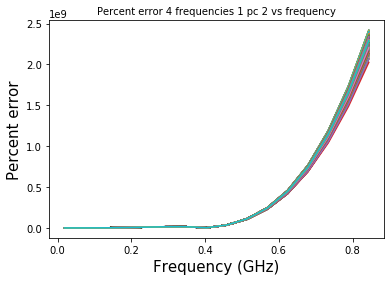

In [273]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_4_1pc_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 4 frequencies 1 pc 2 vs frequency', fontsize = 10)

In [274]:
c = np.load('four_freq_corr1pc.npz')
pred_4_freq_corr1pc = c['arr_0']

In [275]:
ccc = []
cc = []
for i in range(len(oo[0])):
    for m in range(len(xnew_uniform_log)):
        ccc.append((np.abs((pred_4_freq_corr1pc[i][m] - data_4_freq_log[0][i][m])) / data_4_freq_log[0][i][m]) * 100)
cc.append(np.reshape(ccc, (-1, len(xnew_uniform_log))))
per_4_corr1pc = cc[0]

Text(0.5, 1.0, 'Percent error correlated 1 pc vs frequency')

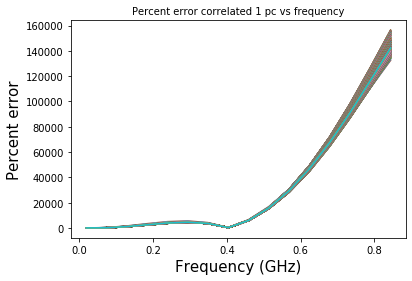

In [276]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_4_corr1pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 1 pc vs frequency', fontsize = 10)

In [277]:
d = np.load('four_freq_corr1pc_2.npz')
pred_4_freq_corr1pc_2 = d['arr_0']

In [278]:
ddd = []
dd = []
for i in range(len(mm[0])):
    for m in range(len(xnew_uniform_log)):
        ddd.append((np.abs((pred_4_freq_corr1pc_2[i][m] - data_4_freq_2_log[0][i][m])) / data_4_freq_2_log[0][i][m]) * 100)
dd.append(np.reshape(ddd, (-1, len(xnew_uniform_log))))
per_4_corr1pc_2 = dd[0]

Text(0.5, 1.0, 'Percent error correlated 1 pc 2 vs frequency')

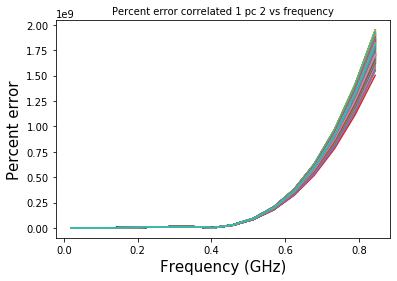

In [279]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_4_corr1pc_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 1 pc 2 vs frequency', fontsize = 10)

In [280]:
e = np.load('4freq_2pc.npz')
pred_4_freq_2pc = e['arr_0']

In [281]:
eee = []
ee = []
for i in range(len(oo[0])):
    for m in range(len(xnew_uniform_log)):
        eee.append((np.abs((pred_4_freq_2pc[i][m] - d_at_4[i][m])) / d_at_4[i][m]) * 100)
ee.append(np.reshape(eee, (-1, len(xnew_uniform))))
per_4_2pc = ee[0]

Text(0.5, 1.0, 'Percent error two principal components vs frequency')

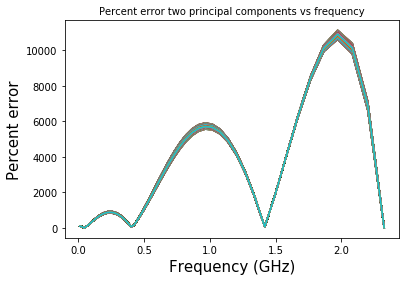

In [282]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform, per_4_2pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error two principal components vs frequency', fontsize = 10)

In [283]:
f = np.load('4freq_2pc_2.npz')
pred_4_freq_2pc_2 = f['arr_0']

In [284]:
fff = []
ff = []
for i in range(len(mm[0])):
    for m in range(len(xnew_uniform_log)):
        fff.append((np.abs((pred_4_freq_2pc_2[i][m] - d_at_4[i][m])) / d_at_4[i][m]) * 100)
ff.append(np.reshape(fff, (-1, len(xnew_uniform_log))))
per_4_2pc_2 = ff[0]

Text(0.5, 1.0, 'Percent error two principal components 2 vs frequency')

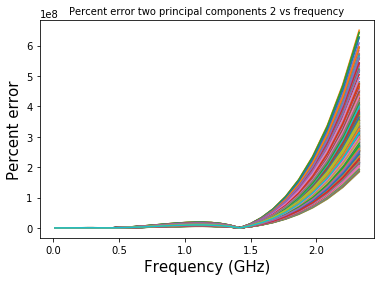

In [285]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform, per_4_2pc_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error two principal components 2 vs frequency', fontsize = 10)

In [286]:
g = np.load('4freq_corr2pc.npz')
pred_4_freq_corr2pc = g['arr_0']

In [287]:
ggg = []
gg = []
for i in range(len(oo[0])):
    for m in range(len(xnew_uniform_log)):
        ggg.append((np.abs((pred_4_freq_corr2pc[i][m] - data_4_freq_log[0][i][m])) / data_4_freq_log[0][i][m]) * 100)
gg.append(np.reshape(ggg, (-1, len(xnew_uniform_log))))
per_4_corr2pc = gg[0]

Text(0.5, 1.0, 'Percent error 4 frequencies two principal components vs frequency')

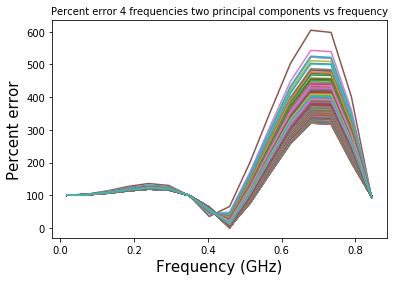

In [288]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_4_corr2pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 4 frequencies two principal components vs frequency', fontsize = 10)

In [289]:
h = np.load('4freq_corr2pc_2.npz')
pred_4_freq_corr2pc_2 = h['arr_0']

In [290]:
hhh = []
hh = []
for i in range(len(mm[0])):
    for m in range(len(xnew_uniform_log)):
        hhh.append((np.abs((pred_4_freq_corr2pc_2[i][m] - data_4_freq_2_log[0][i][m])) / data_4_freq_2_log[0][i][m]) * 100)
hh.append(np.reshape(hhh, (-1, len(xnew_uniform_log))))
per_4_corr2pc_2 = hh[0]

Text(0.5, 1.0, 'Percent error 4 frequencies two principal components 2 vs frequency')

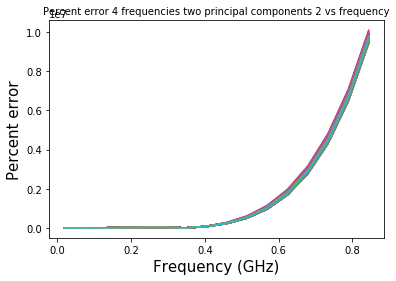

In [291]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform_log, per_4_corr2pc_2[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error 4 frequencies two principal components 2 vs frequency', fontsize = 10)

In [292]:
r = np.load('noisy_1pc_lin.npz')

In [293]:
pred_noisy_1pc_lin = r['arr_0']

In [294]:
n = np.load('noisy_data_2.npz')

In [295]:
noisy_data_new = n['arr_0']

In [296]:
freqs_log = np.log(freqs)

In [297]:
g = np.load('noisy_2pc_lin.npz')
pred_noisy_2pc_lin = g['arr_0']

In [298]:
hh = np.load('noisy_blur_1pc_lin.npz')
pred_noisy_blur_1pc_lin = hh['arr_0']

In [299]:
data_log = sky_read(ipix_disc, sky.signal()(xnew_uniform_log), xnew_uniform_log)

In [300]:
dif = np.load('diff_corr1pc.npz')
pred_diff_corr1pc = dif['arr_0']

In [301]:
di = []
do = []
for i in range(len(ipix_disc)):
    for m in range(len(xnew_uniform_log)):
        di.append((np.abs((pred_diff_corr1pc[i][m] - data_log[0][i][m])) / data_log[0][i][m]) * 100)
do.append(np.reshape(di, (-1, len(xnew_uniform_log))))
per_diff_corr1pc = do[0]

Text(0.5, 1.0, 'Percent error correlated 1 pc vs frequency')

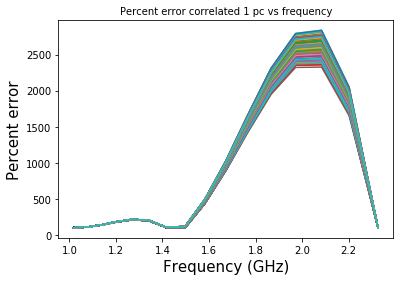

In [302]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform, per_diff_corr1pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated 1 pc vs frequency', fontsize = 10)

In [303]:
uhh = np.load('noisy_data_2.npz')
noisy_data = uhh['arr_0']

Text(0.5, 1.0, 'Blurry noisy data vs frequency')

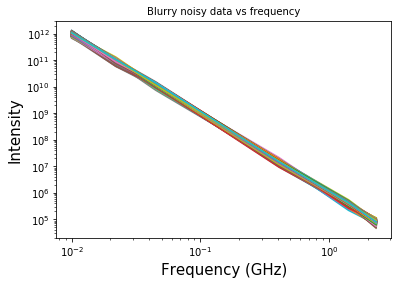

In [304]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.loglog(freqs, blurry_noisy_data[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.title('Blurry noisy data vs frequency', fontsize = 10)

In [305]:
hhh = np.load('blurry_noisy_data_2.npz')
blurry_noisy_data = hhh['arr_0']

In [306]:
uu = np.load('noisy_blur_1pc_lin.npz')
pred_noisy_blur_1pc_lin = uu['arr_0']

In [307]:
noo = np.load('noisy_blur_2pc_lin.npz')
pred_noisy_blur_2pc_lin = noo['arr_0']

In [308]:
fff = np.load('diffblur_corr1pc_lin.npz')
pred_diff_blur_corr1pc_lin = fff['arr_0']

In [309]:
frr = np.load('diff_blurry_data_2.npz')
diff_blurry_data = frr['arr_0']

In [310]:
boo = np.load('diffblur_1pc_line.npz')
pred_diff_blur_1pc_lin = boo['arr_0']

In [311]:
hur = np.load('diff_corr1pc_lin.npz')
pred_diff_corr1pc_lin = hur['arr_0']

In [312]:
data_lin = sky_read(ipix_disc, sky.signal()(xnew_uniform), xnew_uniform)

In [313]:
dii = []
doo = []
for i in range(len(ipix_disc)):
    for m in range(len(xnew_uniform_log)):
        dii.append((np.abs((pred_diff_corr1pc_lin[i][m] - data_lin[0][i][m])) / data_lin[0][i][m]) * 100)
doo.append(np.reshape(dii, (-1, len(xnew_uniform_log))))
per_diff_corr1pc_lin = doo[0]

Text(0.5, 1.0, 'Percent error different correlated one principal components linear vs frequency')

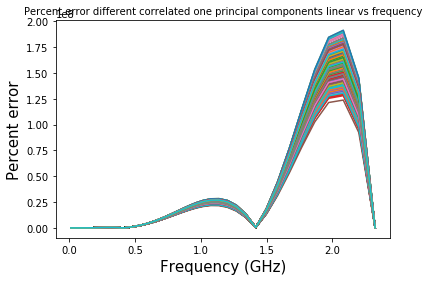

In [314]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_uniform, per_diff_corr1pc_lin [i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error different correlated one principal components linear vs frequency', fontsize = 10)

In [315]:
ggg = np.load('sysblur_1pc_lin.npz')
pred_sysblur_1pc_lin = ggg['arr_0']

In [316]:
foo = np.load('diff_blurry_data.npz')
sys_blurry_data = foo['arr_0']

Text(0.5, 1.0, 'Intensity vs frequency')

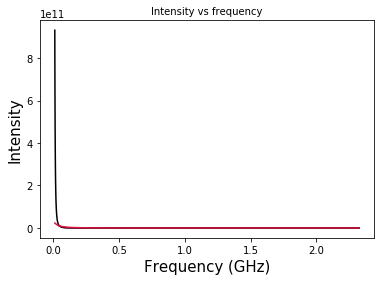

In [317]:
%matplotlib inline
plt.figure()
plt.plot(freqs4_100, dat_4_100[0], color = 'purple')
plt.plot(xnew_uniform, d_at_4[0], color = 'k') #10 frequencies
plt.plot(xnew_uniform, pred_4_freq_2pc[0], color = 'crimson')
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.title('Intensity vs frequency', fontsize = 10)
#These are the predicted and simulated datas together

In [318]:
fr_10 = np.linspace(0.1, 1.8, 10)

In [319]:
d_10 = sky_read(pix_all, sky.signal()(fr_10), fr_10)

In [320]:
data_10 = d_10[0]

In [321]:
np.savez('data_10_freqs', data_10)

In [322]:
pc1 = np.load('10freq_1pc.npz')
pred_10freq_1pc = pc1['arr_0']

In [326]:
fr_10_100 = np.linspace(0.1, 1.38, 100)

In [327]:
d_10_100 = sky_read(pix_all, sky.signal()(fr_10_100), fr_10_100)

In [328]:
d1pc = []
dat_1pc = []
for i in range(len(pix_all)):
    for m in range(100):
        d1pc.append((np.abs((pred_10freq_1pc[i][m] - d_10_100[0][i][m])) / d_10_100[0][i][m]) * 100)
dat_1pc.append(np.reshape(d1pc, (-1, len(fr_10_100))))
per_10_1pc = dat_1pc[0]

Text(0.5, 1.0, 'Percent error one principal component vs frequency')

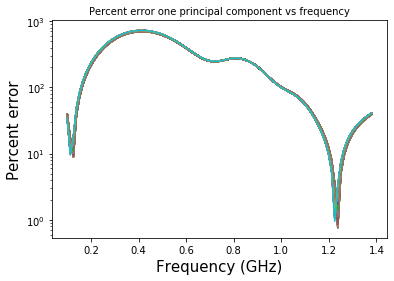

In [329]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.semilogy(fr_10_100, per_10_1pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error one principal component vs frequency', fontsize = 10)

In [330]:
corrpc1 = np.load('10freq_corr1pc.npz')
pred_10freq_corr1pc = corrpc1['arr_0']

In [331]:
pc1_2 = []
corr1pc = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        pc1_2.append((np.abs((pred_10freq_corr1pc[i][m] - d_10_100[0][i][m])) / d_10_100[0][i][m]) * 100)
corr1pc.append(np.reshape(pc1_2, (-1, len(fr_10_100))))
per_10_corr1pc = corr1pc[0]

Text(0.5, 1.0, 'Percent error correlated one principal component vs frequency')

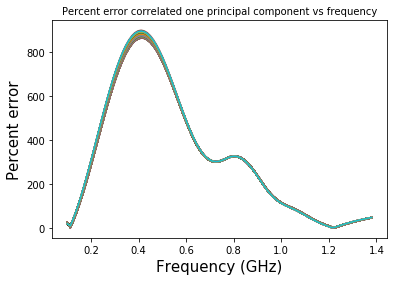

In [332]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(fr_10_100, per_10_corr1pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated one principal component vs frequency', fontsize = 10)

In [333]:
pc2 = np.load('10freq_2pc.npz')
pred_10freq_2pc = pc2['arr_0']

In [334]:
pc2 = []
dat_2pc = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        pc2.append((np.abs((pred_10freq_2pc[i][m] - d_10_100[0][i][m])) / d_10_100[0][i][m]) * 100)
dat_2pc.append(np.reshape(pc2, (-1, len(fr_10_100))))
per_10_2pc= dat_2pc[0]

Text(0.5, 1.0, 'Percent error two principal components vs frequency')

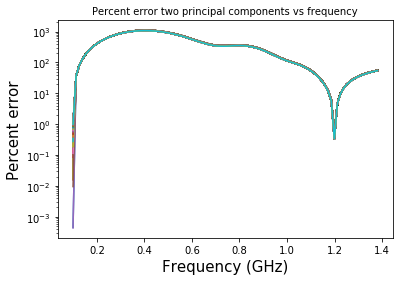

In [335]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.semilogy(fr_10_100, per_10_2pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error two principal components vs frequency', fontsize = 10)

In [336]:
corrpc2 = np.load('10freq_corr2pc.npz')
pred_10freq_corr2pc = corrpc2['arr_0']

In [337]:
corr2pc = []
dat_corr2pc = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        corr2pc.append((np.abs((pred_10freq_corr2pc[i][m] - d_10_100[0][i][m])) / d_10_100[0][i][m]) * 100)
dat_corr2pc.append(np.reshape(corr2pc, (-1, len(fr_10_100))))
per_10_corr2pc = dat_corr2pc[0]

Text(0.5, 1.0, 'Percent error correlated two principal components vs frequency')

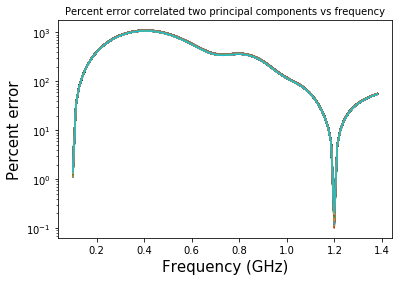

In [338]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.semilogy(fr_10_100, per_10_corr2pc[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated two principal components vs frequency', fontsize = 10)

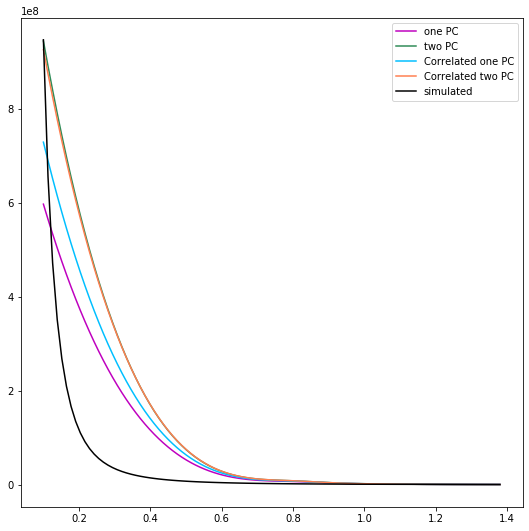

In [339]:
%matplotlib inline
plt.figure(figsize = (9, 9))
plt.plot(fr_10_100, pred_10freq_1pc[0], color = 'm', label = 'one PC')
plt.plot(fr_10_100, pred_10freq_2pc[0], color = 'seagreen', label = 'two PC')
plt.plot(fr_10_100, pred_10freq_corr1pc[0], color = 'deepskyblue', label = 'Correlated one PC')
plt.plot(fr_10_100, pred_10freq_corr2pc[0], color = 'coral', label = "Correlated two PC")
plt.plot(fr_10_100, d_10_100[0][0], color = 'k', label = 'simulated')
plt.legend()
#The plot of the data and the predictions

In [340]:
fr_10_log = np.geomspace(.1, 1.8, 10)

In [341]:
xnew_10 = np.geomspace(0.1, 1.8, 100)

In [342]:
d_10_log = sky_read(pix_all, sky.signal()(xnew_10), xnew_10)

In [343]:
data_10_100_log = d_10_log[0]

In [344]:
d_10_log = sky_read(pix_all, sky.signal()(fr_10_log), fr_10_log)

In [345]:
data_10_log = d_10_log[0]

In [346]:
np.savez('data_10_log.npz', data_10_log)

In [347]:
log_corr1 = np.load('10freq_1pc.npz')
pred_10freqlog_1pc = log_corr1['arr_0']

In [348]:
d1pc_2 = []
dat_1pc_2 = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        d1pc_2.append((np.abs((pred_10freqlog_1pc[i][m] - data_10_100_log[i][m])) / data_10_100_log[i][m]) * 100)
dat_1pc_2.append(np.reshape(d1pc_2, (-1, len(xnew_10))))
per_10_1pc_log = dat_1pc_2[0]

Text(0.5, 1.0, 'Percent error one principal component vs frequency')

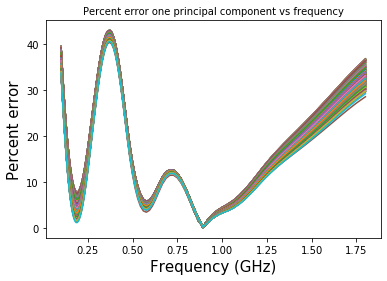

In [349]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_10, per_10_1pc_log[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error one principal component vs frequency', fontsize = 10)

In [350]:
corr1pc_log = np.load('10freq_corr1pc.npz')
pred_10freqlog_corr1pc = corr1pc_log['arr_0']

In [351]:
pc1_2_2 = []
corr1pc_2 = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        pc1_2.append((np.abs((pred_10freqlog_corr1pc[i][m] - data_10_100_log[i][m])) / data_10_100_log[i][m]) * 100)
corr1pc_2.append(np.reshape(pc1_2, (-1, len(xnew_10))))
per_10_corr1pc_log = corr1pc_2[0]

Text(0.5, 1.0, 'Percent error correlated one principal component vs frequency')

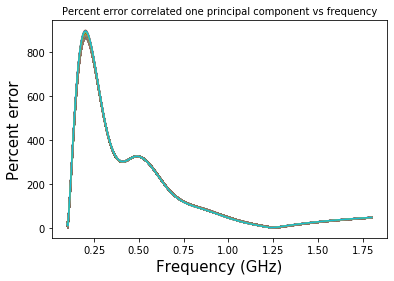

In [352]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_10, per_10_corr1pc_log[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated one principal component vs frequency', fontsize = 10)

In [353]:
log_2pc = np.load('10freqlog_2pc.npz')
pred_10freqlog_2pc = log_2pc['arr_0']

In [354]:
pc2_2 = []
dat_2pc_2 = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        pc2_2.append((np.abs((pred_10freqlog_2pc[i][m] - data_10_100_log[i][m])) / data_10_100_log[i][m]) * 100)
dat_2pc_2.append(np.reshape(pc2_2, (-1, len(xnew_10))))
per_10_2pc_log = dat_2pc_2[0]

Text(0.5, 1.0, 'Percent error two principal components vs frequency')

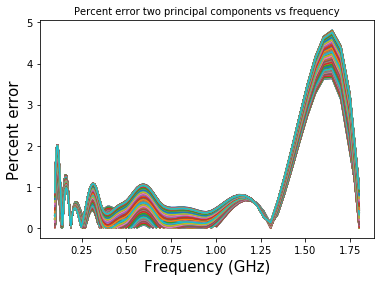

In [355]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_10, per_10_2pc_log[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error two principal components vs frequency', fontsize = 10)
#The best one

In [356]:
corr_2pc_log = np.load('10freqlog_corr2pc.npz')
pred_10freqlog_corr2pc = corr_2pc_log['arr_0']

In [357]:
corr2pc_2 = []
dat_corr2pc_2 = []
for i in range(len(pix_all)):
    for m in range(len(fr_10_100)):
        corr2pc_2.append((np.abs((pred_10freqlog_corr2pc[i][m] - data_10_100_log[i][m])) / data_10_100_log[i][m]) * 100)
dat_corr2pc_2.append(np.reshape(corr2pc_2, (-1, len(xnew_10))))
per_10_corr2pc_log = dat_corr2pc_2 [0]

Text(0.5, 1.0, 'Percent error correlated two principal components vs frequency')

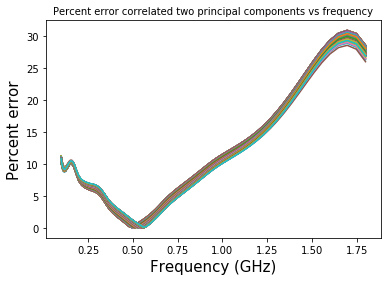

In [358]:
%matplotlib inline
plt.figure()
for i in range(500):
    plt.plot(xnew_10, per_10_corr2pc_log[i])
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Percent error', fontsize = 15)
plt.title('Percent error correlated two principal components vs frequency', fontsize = 10)

Text(0.5, 1.0, 'Intensity vs frequency')

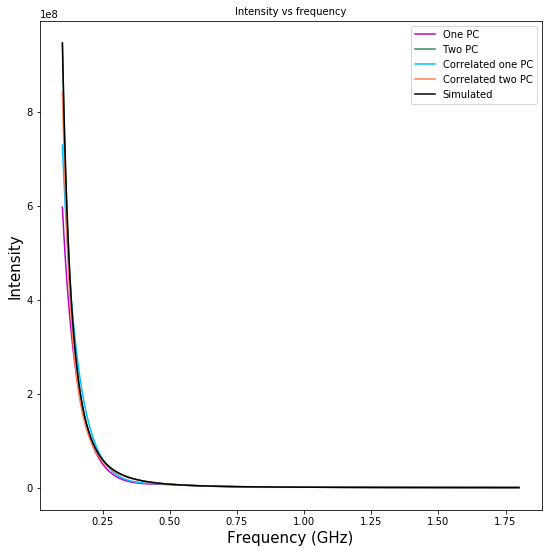

In [359]:
%matplotlib inline
plt.figure(figsize = (9, 9))
plt.plot(xnew_10, pred_10freqlog_1pc[0], color = 'm', label = 'One PC')
plt.plot(xnew_10, pred_10freqlog_2pc[0], color = 'seagreen', label = 'Two PC')
plt.plot(xnew_10, pred_10freqlog_corr1pc[0], color = 'deepskyblue', label = 'Correlated one PC')
plt.plot(xnew_10, pred_10freqlog_corr2pc[0], color = 'coral', label = "Correlated two PC")
plt.plot(xnew_10, data_10_100_log[0], color = 'k', label = 'Simulated')
plt.legend()
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.title('Intensity vs frequency', fontsize = 10)
#The simulations and predictions again

Text(0.5, 1.0, 'Intensity vs frequency')

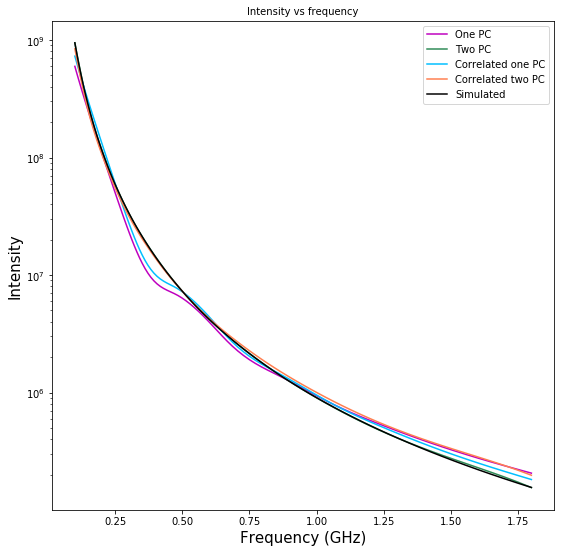

In [360]:
%matplotlib inline
plt.figure(figsize = (9, 9))
plt.semilogy(xnew_10, pred_10freqlog_1pc[0], color = 'm', label = 'One PC')
plt.semilogy(xnew_10, pred_10freqlog_2pc[0], color = 'seagreen', label = 'Two PC')
plt.semilogy(xnew_10, pred_10freqlog_corr1pc[0], color = 'deepskyblue', label = 'Correlated one PC')
plt.semilogy(xnew_10, pred_10freqlog_corr2pc[0], color = 'coral', label = "Correlated two PC")
plt.semilogy(xnew_10, data_10_100_log[0], color = 'k', label = 'Simulated')
plt.legend()
plt.xlabel('Frequency (GHz)', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.title('Intensity vs frequency', fontsize = 10)
#The simulations and predictions with the x-axis on a log scale

These are the maps of the universe with the predicted data imposed on them

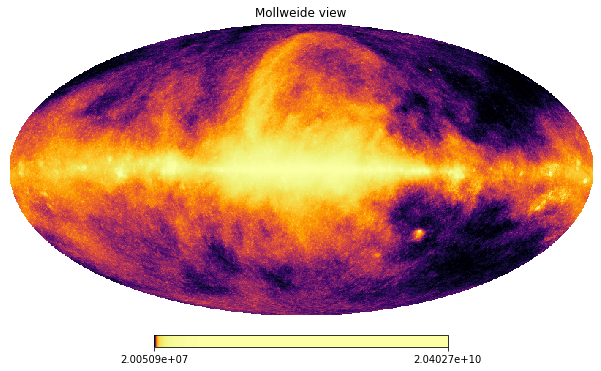

In [361]:
signal = sky.signal()(xnew_10)
for i in range(len(pix_all)):
    signal[24, 0, pix_all[i]] = pred_10freqlog_1pc[i, 24]
hp.mollview(signal[24, 0, :], cmap = 'inferno', norm = 'hist')

In [ ]:
signal = sky.signal()(xnew_10)
for i in range(len(pix_all)):
    signal[24, 0, pix_all[i]] = pred_10freqlog_2pc[i, 24]
hp.mollview(signal[24, 0, :], cmap = 'inferno', norm = 'hist')

In [ ]:
signal = sky.signal()(xnew_10)
for i in range(len(pix_all)):
    signal[24, 0, pix_all[i]] = pred_10freqlog_corr1pc[i, 24]
hp.mollview(signal[24, 0, :], cmap = 'inferno', norm = 'hist')

In [ ]:
signal = sky.signal()(xnew_10)
for i in range(len(pix_all)):
    signal[24, 0, pix_all[i]] = pred_10freqlog_corr2pc[i, 24]
hp.mollview(signal[24, 0, :], cmap = 'inferno', norm = 'hist')

In [ ]:
signal = sky.signal()(xnew_10)
hp.mollview(signal[24, 0, :], cmap = 'inferno', norm = 'hist')

And then the differences

In [ ]:
diff_1pc = []
for i in range(len(pix_all)):
    diff_1pc.append(np.abs(pred_10freqlog_1pc[i][24] - data_10_100_log[i][24]))

In [ ]:
diff_2pc = []
for i in range(len(pix_all)):
    diff_2pc.append(np.abs(pred_10freqlog_2pc[i][24] - data_10_100_log[i][24]))

In [ ]:
diff_corr1pc = []
for i in range(len(pix_all)):
    diff_corr1pc.append(np.abs(pred_10freqlog_corr1pc[i][24] - data_10_100_log[i][24]))

In [ ]:
diff_corr2pc = []
for i in range(len(pix_all)):
    diff_corr2pc.append(np.abs(pred_10freqlog_corr2pc[i][24] - data_10_100_log[i][24]))

In [ ]:
signal = sky.signal()(xnew_10[24])
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_1pc[i]
hp.mollview(signal[0, :], cmap = 'inferno', norm = 'hist', title = 'One principal component', min = 0)

In [ ]:
signal = sky.signal()(xnew_10[24])
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_2pc[i]
hp.mollview(signal[0, :], cmap = 'inferno', norm = 'hist', title = 'Two Principal Components', min = 0)

In [ ]:
signal = sky.signal()(xnew_10[24])
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_corr1pc[i]
hp.mollview(signal[0, :], cmap = 'inferno', norm = 'hist', title = 'Correlated 1 Principal Component', min = 0)

In [ ]:
signal = sky.signal()(xnew_10[24])
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_corr2pc[i]
hp.mollview(signal[0, :], cmap = 'inferno', norm = 'hist', title = 'Correlated 2 Principal Component', min = 0)

The differences with a different color and a set max so you can see how different they are

In [ ]:
signal[0][:] = 0
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = np.abs(diff_corr2pc[i])
hp.mollview(signal[0, :], cmap = 'PuRd', norm = 'hist', title = 'Correlated 2 Principal Component', min = 0, max = 10*(10**10))

In [ ]:
signal[0][:] = 0
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_corr1pc[i]
hp.mollview(signal[0, :], cmap = 'PuRd', norm = 'hist', title = 'Correlated 1 Principal Component', min = 0, max = 10*(10**10))

In [ ]:
signal[0][:] = 0
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_2pc[i]
hp.mollview(signal[0, :], cmap = 'PuRd', norm = 'hist', title = 'Two Principal Components', min = 0, max = 10*(10**10))

In [ ]:
signal[0][:] = 0
for i in range(len(pix_all)):
    signal[0, pix_all[i]] = diff_1pc[i]
hp.mollview(signal[0, :], cmap = 'PuRd', norm = 'hist', title = 'One principal component', max = 10*(10**10))